<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/V5_Skripsi_Nadira_80_20_5_Fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center;"><b>SKRIPSI</b></h1>
<h2 style="text-align:center;">
  <b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>
  untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b>
</h2>

<p style="text-align:center;">
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
</p>

<p style="text-align:center;">
  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
</p>

<p style="text-align:center;">
  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</p>


## Step 1: Inisialisasi Pipeline & Manajemen Pustaka

Tahap ini adalah **persiapan awal** sebelum analisis dimulai.

* Kode akan **menginstal pustaka** yang dibutuhkan (misalnya *pandas* untuk manipulasi data, *scikit-learn* untuk machine learning, *catboost*, dan *xgboost*).
* Setelah itu, dilakukan **import fungsi-fungsi penting** (seperti `train_test_split`, `RandomForestClassifier`, dsb.) agar siap dipakai pada tahap selanjutnya.
* Selain itu, ada **pengaturan konfigurasi visualisasi** supaya hasil grafik dan output terlihat lebih rapi serta konsisten.

👉 **Tujuan:** memastikan semua *alat* yang diperlukan sudah tersedia dan lingkungan kerja siap pakai.

👉 **Kenapa penting:** tanpa instalasi & import pustaka ini, fungsi-fungsi utama tidak bisa dipanggil, sehingga analisis atau pelatihan model bisa gagal di tengah jalan.

📖 **Referensi:**
Kotsiantis, S. B., Kanellopoulos, D., & Pintelas, P. E. (2006). *Data preprocessing for supervised learning.* International Journal of Computer Science, 1(2), 111–117.
[ResearchGate Link](https://www.researchgate.net/publication/228084519_Data_Preprocessing_for_Supervised_Learning)
(Jurnal ini membahas pentingnya berbagai teknik preprocessing, termasuk pembersihan data, sebagai langkah fundamental sebelum pemodelan).

In [1]:
# =============================================================================
# STEP 1: INISIALISASI LINGKUNGAN & PUSTAKA (VERSI KOMPREHENSIF)
# =============================================================================
import sys
import warnings

print("="*80)
print("🚀 MEMULAI STEP 1: INISIALISASI LINGKUNGAN & PUSTAKA")
print("="*80)

# --- 1A: Deteksi Lingkungan & Instalasi Pustaka ---
# Semua pustaka yang dibutuhkan di seluruh pipeline diinstal di sini.
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Menginstal semua paket yang dibutuhkan...")
    # Instalasi dalam mode senyap (-q) untuk output yang bersih
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Instalasi paket selesai!")
else:
    print("📘 Menjalankan di lingkungan lokal. Pastikan semua paket sudah terinstal.")
    print("   (pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost)")

# --- 1B: Impor Semua Pustaka ---
# Semua pustaka diimpor di awal untuk memastikan ketersediaan di seluruh notebook.
print("\n📚 Mengimpor semua pustaka yang dibutuhkan untuk pipeline...")

# Pustaka Dasar & Analisis Data
import pandas as pd
import numpy as np

# Pustaka Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Utilitas
import time
import re
import chardet
from IPython.display import display, HTML, Markdown

# Preprocessing & Metrik dari Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Impor spesifik untuk Google Colab
if IN_COLAB:
    from google.colab import files

print("✅ Semua pustaka berhasil diimpor.")

# --- 1C: Konfigurasi Global & Tampilan ---
print("\n🎨 Menerapkan konfigurasi global untuk peringatan, visualisasi, dan tampilan...")

# Mengelola peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# Konfigurasi Visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Konfigurasi Tampilan Pandas
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

print("✅ Konfigurasi global berhasil diterapkan.")
print("\n" + "🎉"*60)
print("STEP 1 SELESAI: Lingkungan, pustaka, dan konfigurasi telah siap sepenuhnya.")
print("="*80)

🚀 MEMULAI STEP 1: INISIALISASI LINGKUNGAN & PUSTAKA
📦 Lingkungan Google Colab terdeteksi. Menginstal semua paket yang dibutuhkan...
✅ Instalasi paket selesai!

📚 Mengimpor semua pustaka yang dibutuhkan untuk pipeline...
✅ Semua pustaka berhasil diimpor.

🎨 Menerapkan konfigurasi global untuk peringatan, visualisasi, dan tampilan...
✅ Konfigurasi global berhasil diterapkan.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 1 SELESAI: Lingkungan, pustaka, dan konfigurasi telah siap sepenuhnya.


## Step 2: Pemuatan & Pembersihan Data Global (Pra-pemisahan)

### Deskripsi Tahapan

Pada tahap ini, dataset mentah dimuat dari file CSV dan melewati serangkaian proses pembersihan dan persiapan data secara global. Proses ini krusial dan dilakukan **sebelum** data dipisah menjadi set pelatihan dan pengujian untuk memastikan konsistensi dan mencegah kebocoran data (*data leakage*).

Langkah-langkah utamanya meliputi:

1.  **Standardisasi Nama Kolom**: Mengubah semua nama kolom ke dalam format `snake_case` (huruf kecil, tanpa spasi, dan menggunakan garis bawah) untuk konsistensi dan kemudahan akses.
2.  **Penghapusan Data Tidak Relevan**: Menghapus kolom yang tidak memiliki nilai prediktif (contoh: `patient_id`) dan baris data yang terduplikasi secara penuh untuk menghindari bias pada model.
3.  **Standardisasi Nilai Kategorikal**: Menyeragamkan nilai-nilai yang memiliki makna sama tetapi ditulis berbeda. Sebagai contoh, nilai seperti `y`, `true`, dan `positive` akan distandardisasi menjadi `yes`.
4.  **Rekayasa & Imputasi Fitur (`fever`)**: Mengubah kolom `fever` yang memiliki format teks tidak terstruktur menjadi dua fitur numerik yang informatif:
    * `fever_presence`: Fitur biner (ya/tidak) yang menandakan keberadaan demam.
    * `fever_duration_days`: Fitur numerik yang merepresentasikan durasi demam dalam hari.
    * **Justifikasi Imputasi**: Jika pasien tercatat demam namun durasinya tidak spesifik, nilai durasi akan diisi (diimputasi) sebagai **1 hari**. Ini adalah pendekatan konservatif yang logis, karena jika demam ada, durasinya minimal adalah satu hari.

---

### Tujuan & Justifikasi

**Tujuan** dari tahap ini adalah untuk mentransformasi data mentah yang seringkali tidak konsisten dan "berantakan" menjadi sebuah dataset yang bersih, terstruktur, dan siap untuk tahap pemodelan *machine learning*.

**Mengapa ini penting?**
* **Mencegah Error**: Nama kolom dan nilai yang tidak konsisten dapat menyebabkan *bug* dan error pada saat analisis dan pemodelan.
* **Meningkatkan Kualitas Model**: Data duplikat dapat membuat model menjadi bias, sementara nilai yang tidak standar dapat membingungkan algoritma.
* **Memperkaya Informasi**: Rekayasa fitur mengubah data implisit menjadi sinyal eksplisit yang lebih mudah ditangkap oleh model, sehingga berpotensi meningkatkan akurasi prediksi.

---

### Referensi Akademis

* **Van den Broeck, J., et al. (2005).** *Data cleaning: detecting, diagnosing, and editing data abnormalities.* PLoS Medicine, 2(10), e267.
    *(Jurnal ini mendukung pentingnya proses pembersihan data secara sistematis—seperti standardisasi, penghapusan duplikat, dan penanganan anomali—sebagai fondasi untuk analisis data yang valid dan andal dalam penelitian medis.)*

* **Zheng, A., & Casari, A. (2018).** *Feature engineering for machine learning: principles and techniques for data scientists*. O'Reilly Media, Inc.
    *(Buku ini merupakan referensi standar yang memvalidasi praktik rekayasa fitur. Transformasi kolom `fever` adalah contoh klasik dari rekayasa fitur, di mana domain knowledge digunakan untuk mengekstrak informasi yang lebih bermakna dari data mentah.)*

In [2]:
# =============================================================================
# STEP 2: DATA LOADING & GLOBAL PRE-PROCESSING (REVISED & SIMPLIFIED)
# =============================================================================

print("\n" + "="*80)
print("🚀 MEMULAI STEP 2: DATA LOADING & GLOBAL PRE-PROCESSING")
print("="*80)

# =============================================================================
# BAGIAN A: KONFIGURASI (TETAP SAMA)
# =============================================================================
VALUE_STANDARDIZATION_MAP = {
    'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',
    'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',
    'm': 'male', 'man': 'male', 'f': 'female', 'woman': 'female',
    'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'
}
TARGET_COLUMN = 'diagnosing'
DEFAULT_FILENAME = 'MonkeyPox Dataset Skripsi.csv'

# =============================================================================
# BAGIAN B: FUNGSI-FUNGSI HELPER (DENGAN PERBAIKAN PADA FUNGSI LAPORAN)
# =============================================================================

def load_csv_robustly(file_path):
    # Fungsi ini tidak berubah
    print(f"🔄 Memuat CSV: '{file_path}'...")
    encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil dimuat dengan encoding '{encoding}'. Bentuk data: {df.shape}")
            return df
        except (UnicodeDecodeError, FileNotFoundError):
            print(f"   - Gagal dengan encoding '{encoding}', mencoba selanjutnya...")
    try:
        print("   - Mencoba deteksi encoding otomatis dengan chardet...")
        with open(file_path, 'rb') as f:
            detected_encoding = chardet.detect(f.read(50000))['encoding']
        df = pd.read_csv(file_path, encoding=detected_encoding)
        print(f"✅ Berhasil dimuat dengan encoding terdeteksi '{detected_encoding}'. Bentuk data: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ Gagal total memuat file: {e}")
        return None

def clean_column_names_and_duplicates(df):
    # Fungsi ini tidak berubah
    print("\n--- 2.1: Membersihkan Nama Kolom & Duplikat ---")
    original_columns = df.columns
    cleaned_columns = {col: re.sub(r'[^a-z0-9_]+', '_', col.strip().lower()).strip('_') for col in original_columns}
    df.rename(columns=cleaned_columns, inplace=True)
    id_cols = ['id', 'patient_id']
    df.drop(columns=[c for c in id_cols if c in df.columns], inplace=True, errors='ignore')
    n_dupes_before = df.duplicated().sum()
    if n_dupes_before > 0:
        df.drop_duplicates(keep='first', inplace=True)
    print(f"✅ Nama kolom dibersihkan dan {n_dupes_before} baris duplikat dihapus.")
    return df

def standardize_all_values(df, replacement_map):
    # Fungsi ini tidak berubah
    print("\n--- 2.2: Melakukan Standardisasi Nilai ---")
    report_data = []
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        before_counts = df[col].value_counts()
        df[col] = df[col].astype(str).str.lower().str.strip().replace(replacement_map)
        after_counts = df[col].value_counts()
        if not before_counts.equals(after_counts):
            report_data.append({
                'column': col, 'before_counts': before_counts, 'after_counts': after_counts,
                'unique_before': len(before_counts), 'unique_after': len(after_counts)
            })
    print(f"✅ Standardisasi nilai selesai. {len(report_data)} kolom diubah.")
    return df, report_data

def generate_standardization_report(report_data):
    """
    Membuat laporan visual dan tekstual dari data standardisasi.
    REVISI: Sekarang menampilkan dua tabel terpisah (Before & After) untuk kejelasan maksimal.
    """
    if not report_data:
        print("\n✅ Tidak ada nilai yang memerlukan standardisasi.")
        return

    print("\n" + "📋"*40); print("LAPORAN HASIL STANDARDIZASI NILAI"); print("📋"*40)
    for report in report_data:
        print("\n" + "="*70)
        print(f"🔎 Laporan untuk Kolom: '{report['column']}'")
        print(f"   - Jumlah nilai unik berkurang dari {report['unique_before']} menjadi {report['unique_after']}.")
        print("-" * 70)

        # ======================================================================
        # !!! PERBAIKAN UTAMA DI SINI !!!
        # Membuat dua tabel terpisah untuk "Before" dan "After".
        # ======================================================================

        # --- Tabel SEBELUM ---
        before_df = report['before_counts'].reset_index()
        before_df.columns = ['Nilai Kategori', 'Jumlah']
        print("   --- SEBELUM Standardisasi ---")
        print(before_df.to_string(index=False))

        # --- Tabel SESUDAH ---
        after_df = report['after_counts'].reset_index()
        after_df.columns = ['Nilai Kategori', 'Jumlah']
        print("\n   --- SETELAH Standardisasi ---")
        print(after_df.to_string(index=False))
        print("="*70)
        # ======================================================================

# =============================================================================
# BAGIAN C: FUNGSI UTAMA & EKSEKUSI (TETAP SAMA)
# =============================================================================

def run_step2_pipeline():
    # Fungsi ini tidak berubah
    df = None
    print("--- 2.0: Memuat Data ---")
    if IN_COLAB:
        try:
            print("   📤 Silakan unggah file CSV Anda...");
            uploaded = files.upload()
            if not uploaded:
                print("   🚫 Tidak ada file diunggah."); return None, None
            file_name = next(iter(uploaded))
            df = load_csv_robustly(file_name)
        except Exception as e:
            print(f"   💥 Error saat mengunggah: {e}"); return None, None
    else:
        df = load_csv_robustly(DEFAULT_FILENAME)

    if df is None:
        return None, None

    if "Monkeypox" in df.columns:
        df.rename(columns={"Monkeypox": TARGET_COLUMN}, inplace=True)

    df_cleaned = clean_column_names_and_duplicates(df)
    df_standardized, report = standardize_all_values(df_cleaned, VALUE_STANDARDIZATION_MAP)

    generate_standardization_report(report)

    print("\n--- 2.3: Memisahkan Fitur (X) dan Target (y) ---")
    if TARGET_COLUMN in df_standardized.columns:
        X = df_standardized.drop(columns=[TARGET_COLUMN])
        y = df_standardized[TARGET_COLUMN]
        print(f"   - Target (y) ditetapkan sebagai: '{TARGET_COLUMN}'")
        print(f"\n   - Bentuk X: {X.shape}\n   - Bentuk y: {y.shape}")
        return X, y
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan.")
        return None, None

# --- Jalankan pipeline utama Step 2 ---
try:
    X_initial, y_initial = run_step2_pipeline()
    if X_initial is not None:
        print("\n" + "🎉"*60)
        print("STEP 2 SELESAI: Data telah dimuat, dibersihkan, dan dipisahkan.")
        print("="*80)
    else:
        print("\n" + "🛑"*60); print("STEP 2 GAGAL. Periksa error di atas."); print("="*80)
except NameError as e:
    print(f"\n🛑 Gagal menjalankan Step 2. Pastikan file '{DEFAULT_FILENAME}' ada di direktori yang sama, atau jalankan di Colab untuk mengunggah file.")
    print(f"   Error: {e}")


🚀 MEMULAI STEP 2: DATA LOADING & GLOBAL PRE-PROCESSING
--- 2.0: Memuat Data ---
   📤 Silakan unggah file CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi (1).csv
🔄 Memuat CSV: 'MonkeyPox Dataset Skripsi (1).csv'...
✅ Berhasil dimuat dengan encoding 'utf-8'. Bentuk data: (500, 50)

--- 2.1: Membersihkan Nama Kolom & Duplikat ---
✅ Nama kolom dibersihkan dan 0 baris duplikat dihapus.

--- 2.2: Melakukan Standardisasi Nilai ---
✅ Standardisasi nilai selesai. 28 kolom diubah.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
LAPORAN HASIL STANDARDIZASI NILAI
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋

🔎 Laporan untuk Kolom: 'sex'
   - Jumlah nilai unik berkurang dari 2 menjadi 2.
----------------------------------------------------------------------
   --- SEBELUM Standardisasi ---
Nilai Kategori  Jumlah
         male      259
       female      241

   --- SETELAH Standardisasi ---
Nilai Kategori  Jumlah
          male     259
        female     241

🔎 Laporan untuk Kolom: 'transmission_rank'
   - Jumlah nilai unik berkurang dari 7 menjadi 4.
------------------------------------------

In [3]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,country_of_acquisition,smallpox_vaccination_history,hiv_hepatitis_b_and_hepatitis_c_status,fever,rectal_pain_or_pain_on_defecation,dysuria,bleeding_discharge_per_rectum,conjunctivitis,oropharyngeal_manifestations,back_pain,myalgia,headache,sexually_transmitted_infections,lymphadenopathy,approximate_maximum_number_of_concurrent_lesions,distribution_of_lesions,complications_of_illness,monkeypox_viral_dna_detected_in_blood,monkeypox_viral_dna_detected_in_nose_or_throat_swab,monkeypox_viral_dna_detected_in_urine,antivirals_received,day_of_illness_treatment_commenced,complications_of_treatment,duration_of_hospitalization_with_monkeypox_days,sore_throat,chills,wbc_count_cells_mm3_normal_adult_range_4000_9000,hematocrit_normal_39_49_for_men_and_35_45_for_women,platelet_count_109_platelets_l_normal_adult_range_150_400,sodium_level_mmol_l_normal_adult_range_136_145,potassium_level_mmol_l_normal_adult_range_3_5_5_0,blood_urea_nitrogen_level_mg_dl_normal_adult_range_10_20,creatinine_level_mg_dl_normal_adult_range_1_5,calcium_level_mmol_l_normal_adult_range_9_10_5,total_bilirubin_level_mg_dl_normal_adult_range_0_3_1,ast_level_u_l_normal_adult_range_0_35,alt_level_u_l_normal_adult_range_0_35,alp_level_u_l_normal_adult_range_40_140,arthralgia_6_7_to_15_8,albumin_level_mg_dl_normal_adult_range_3_5_5_5,hospitalized,date_confirmation,rt_pcr,outcome_of_monkeypox_infection,diagnosed_disease
0,49,female,isolated,nigeria,no,no,yes (2days),yes,no,no,yes,tonsillar erythema,no,yes,yes,rectum,yes,150,"face, scalp, trunk, limbs, palms, glans penis,...",low mood and emotional lability. ulcerated ing...,yes,yes,yes,brincidofovir 200 mg (one dose) orally,7,transaminitis (peak alt 331 u/l),26,yes,yes,22135,48,109,129,2.4,8.4,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,5/6/2022,yes,full recovery,monkeypox
1,52,female,index,spain,no,yes,yes,no,yes,no,yes,abscess,yes,no,no,purulent penile discharge.,no,40,"face, trunk, arms, and legs","deep tissue abscesses, severe pain, and low mood",no,no,yes,no,7,"transaminitis (peak alt 127 u/l), nausea, and ...",15,yes,no,14026,48,138,131,1.9,8.4,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,8/31/2022,no,full recovery,monkeypox
2,76,male,index,nigeria,no,no,yes (4days),yes,no,yes,yes,pustules,yes,yes,no,throat,yes,100,"face, trunk, limbs, palms, soles, and scrotum","deep tissue abscesses, severe pain, and low mood",yes,yes,yes,brincidofovir 200 mg (two dose) orally,6,transaminitis (peak alt 550 u/l),27,yes,no,26742,56,131,117,2.9,8.3,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,5/12/2022,yes,full recovery,monkeypox
3,42,female,secondary,nigeria,mva six days post-exposure or 12 days pre-illness,yes,coryzal illness (1 day),no,yes,no,no,oedema,yes,no,yes,urethra/urine,no,32,"face, trunk, hands (including nail bed), and l...","conjunctivitis, painful disruption of thumbnai...",yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,"transaminitis (peak alt 127 u/l), nausea, and ...",35,yes,no,24688,49,115,126,2.4,7.8,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,8/13/2022,yes,full recovery,monkeypox
4,67,male,isolated,nigeria,no,no,yes (2days),no,yes,no,yes,abscess,no,yes,no,multiple site,yes,100,"face, scalp, trunk, limbs, penile shaft, palms...",ulcerated inguinal lesion with delayed healing,yes,yes,yes,brincidofovir 200 mg (two dose) orally,7,no,39,yes,yes,20346,52,144,126,3.3,7.9,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,5/15/2022,no,full recovery,monkeypox
5,74,female,index,uk,no,no,no,no,yes,no,no,tonsillar erythema,yes,yes,yes,throat,yes,40,"face, trunk, limbs, palms, and penile shaft",no,no,yes,no,no,10,no,13,no,yes,21414,48,123,110,3.1,7.6,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,5/15/2022,yes,full recovery,monkeypox
6,78,male,tertiary,nigeria,no,not tested (parents negative),no,no,no,yes,yes,pustules,yes,yes,no,unknown,yes,30,"face, trunk, arms, and legs",pruritis and contact dermatitis from cleaning ...,yes,yes,no,no,4,no,22,yes,no,14649,58,131,130,2.9,7.7,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,6/19/2022,no,full recovery,monkeypox
7,44,female,se

,diagnosing
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,no


## Step 3: Pembagian Data (Train-Test Split 80/20)

### Apa yang dilakukan?

Dataset dibagi menjadi dua bagian dengan rasio **80/20**:

1. **Data Latih (80%)** → digunakan untuk proses pembelajaran (training, validasi silang, dan *hyperparameter tuning*).
2. **Data Uji (20%)** → dipisahkan sejak awal dan tidak pernah dilihat model hingga tahap evaluasi akhir.

Pembagian dilakukan dengan **stratifikasi** (`stratify=y`) agar distribusi kelas target pada data latih dan data uji tetap sama dengan dataset asli.

### Untuk apa?

Untuk menyediakan data khusus (20%) yang berfungsi sebagai **“ujian akhir”**. Data ini hanya dipakai sekali di tahap akhir untuk menilai performa model pada data yang benar-benar baru.

### Kenapa perlu?

* **Mencegah Kebocoran Data**: model tidak boleh belajar dari data uji agar hasil evaluasi objektif.
* **Mencegah Hafalan**: jika model melihat semua data, ia bisa sekadar menghafal, bukan belajar pola.
* **Pentingnya Stratifikasi**: menjaga proporsi kelas tetap seimbang sehingga evaluasi tidak bias akibat distribusi yang timpang.

### Jurnal Acuan

* **Xu, Y., & Goodacre, R. (2018).** On splitting training and validation set: A comparative study of cross-validation, bootstrap and systematic sampling for estimating the generalization performance of supervised learning. *Journal of Analysis and Testing*, 2(3), 249–262.
  *(Jurnal ini membahas berbagai metode pembagian data dan validasi, termasuk hold-out (train-test split) sebagai pendekatan fundamental untuk mengevaluasi kemampuan generalisasi model. Ini mendukung justifikasi penggunaan data uji yang terpisah untuk mendapatkan estimasi performa yang tidak bias.)*

* **Gholamy, A., Kreinovich, V., & Kosheleva, O. (2018).** Why 70/30 or 80/20 relation between training and testing sets: a pedagogical explanation. *Departmental Technical Reports (CS)*, 1201.
  *(Paper ini memberikan penjelasan teoretis mengenai alasan di balik penggunaan rasio pembagian data yang umum seperti 80/20, yang Anda gunakan dalam pipeline ini.)*


In [4]:
# =============================================================================
# STEP 3: DATA SPLITTING & STRUCTURAL FEATURE ENGINEERING
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re

print("\n" + "="*80)
print("🚀 MEMULAI STEP 3: DATA SPLITTING & STRUCTURAL FEATURE ENGINEERING")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI PEMBAGIAN DATA
# =============================================================================
def split_data(X, y, test_size=0.20, random_state=123):
    """
    Membagi data menjadi set Latih (80%) dan Uji (20%) secara reproducible
    dengan stratifikasi untuk menjaga proporsi kelas target.
    """
    print("--- 3.1: Memisahkan Data Menjadi Set Latih dan Uji ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    print(f"✅ Data berhasil dipisahkan dengan random_state={random_state} dan stratifikasi.")
    print("\n   Bentuk Data Hasil Pemisahan:")
    print(f"   - Training Set (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"   - Test Set     (X_test, y_test):   {X_test.shape}, {y_test.shape}")

    return X_train, X_test, y_train, y_test

# =============================================================================
# BAGIAN B: FUNGSI REKAYASA FITUR STRUKTURAL
# =============================================================================
def perform_structural_engineering(df, df_name="data"):
    """
    Menjalankan semua rekayasa fitur STRUKTURAL (membongkar kolom kompleks).
    Fungsi ini diterapkan setelah data dipisah untuk mencegah data leakage.
    """
    print(f"\n   - Memproses {df_name}...")
    df_engineered = df.copy()

    # --- 1. Rekayasa Fitur untuk 'fever' ---
    if 'fever' in df_engineered.columns:
        fever_duration = df_engineered['fever'].str.extract(r'\((\d+)\s*day', expand=False)
        df_engineered['fever_duration_days'] = pd.to_numeric(fever_duration, errors='coerce').fillna(0).astype(int)
        df_engineered['is_prolonged_fever'] = df_engineered['fever'].str.contains('prolonged', case=False, na=False).astype(int)
        df_engineered.drop(columns=['fever'], inplace=True)

    # --- 2. Rekayasa Fitur untuk 'antivirals_received' ---
    if 'antivirals_received' in df_engineered.columns:
        antivirals_col = df_engineered['antivirals_received'].str.lower().fillna('none')
        df_engineered['antiviral_name'] = antivirals_col.str.extract(r'^(\w+)', expand=False).replace('none', 'none')
        dosage = antivirals_col.str.extract(r'(\d+)\s*mg', expand=False)
        df_engineered['antiviral_dosage_mg'] = pd.to_numeric(dosage, errors='coerce').fillna(0).astype(int)
        df_engineered.drop(columns=['antivirals_received'], inplace=True)

    # --- 3. Rekayasa Fitur untuk 'complications_of_treatment' ---
    if 'complications_of_treatment' in df_engineered.columns:
        complications_col = df_engineered['complications_of_treatment'].str.lower().fillna('none')
        df_engineered['has_treatment_complication'] = np.where(complications_col.str.contains('none', na=True), 0, 1)
        peak_alt = complications_col.str.extract(r'peak\s*alt\s*(\d+)', expand=False)
        df_engineered['peak_alt_level'] = pd.to_numeric(peak_alt, errors='coerce').fillna(0).astype(int)
        df_engineered.drop(columns=['complications_of_treatment'], inplace=True)

    return df_engineered

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_initial' in locals() and y_initial is not None:
        PIPELINE_RANDOM_STATE = 123

        # === Langkah 1: Panggil fungsi pemisahan data ===
        X_train, X_test, y_train, y_test = split_data(
            X_initial, y_initial, test_size=0.20, random_state=PIPELINE_RANDOM_STATE
        )

        # === Langkah 2: Panggil fungsi rekayasa fitur setelah data dipisah ===
        print("\n--- 3.2: Menerapkan Rekayasa Fitur Struktural (Post-Split) ---")

        # Terapkan pada data latih dan uji secara terpisah
        X_train_featured = perform_structural_engineering(X_train, "X_train")
        X_test_featured = perform_structural_engineering(X_test, "X_test")

        print("\n✅ Rekayasa fitur struktural selesai diterapkan pada kedua set data.")
        print("\n" + "-"*60)
        print("HASIL AKHIR STEP 3:")
        print(f"   - Bentuk X_train_featured: {X_train_featured.shape}")
        print(f"   - Bentuk X_test_featured:  {X_test_featured.shape}")

        print("\n" + "🎉"*60)
        print("STEP 3 SELESAI: Data telah dipisah dan fitur struktural telah direkayasa.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 3 karena `X_initial` dan `y_initial` dari Step 2 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 3: {e}")


🚀 MEMULAI STEP 3: DATA SPLITTING & STRUCTURAL FEATURE ENGINEERING
--- 3.1: Memisahkan Data Menjadi Set Latih dan Uji ---
✅ Data berhasil dipisahkan dengan random_state=123 dan stratifikasi.

   Bentuk Data Hasil Pemisahan:
   - Training Set (X_train, y_train): (400, 48), (400,)
   - Test Set     (X_test, y_test):   (100, 48), (100,)

--- 3.2: Menerapkan Rekayasa Fitur Struktural (Post-Split) ---

   - Memproses X_train...

   - Memproses X_test...

✅ Rekayasa fitur struktural selesai diterapkan pada kedua set data.

------------------------------------------------------------
HASIL AKHIR STEP 3:
   - Bentuk X_train_featured: (400, 51)
   - Bentuk X_test_featured:  (100, 51)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3 SELESAI: Data telah dipisah dan fitur struktural telah direkayasa.


## Step 4: Seleksi Fitur & Investigasi Kebocoran Data

### Apa yang dilakukan?
Tahap ini melakukan proses seleksi fitur secara cerdas dalam dua sub-tahap, yang keduanya "belajar" **hanya dari data latih (80%)** untuk mencegah kebocoran informasi:
1.  **Seleksi Berbasis Pengetahuan Domain**: Kode ini pertama-tama memilih fitur-fitur yang dianggap relevan secara klinis untuk diagnosis Monkeypox berdasarkan daftar yang telah ditentukan sebelumnya. Ini adalah bentuk *feature selection* yang dipandu oleh keahlian di bidangnya.
2.  **Investigasi Kebocoran Data (*Leakage*)**: Setelah itu, kode secara otomatis memeriksa setiap fitur yang tersisa untuk mencari "fitur bocor". Fitur bocor adalah fitur yang secara tidak wajar memiliki hubungan sempurna dengan target. Misalnya, jika setiap pasien yang memiliki gejala 'X' pasti didiagnosis 'yes', maka gejala 'X' dianggap sebagai fitur bocor dan akan dihapus.

Setelah daftar fitur final ditentukan, daftar tersebut diterapkan secara konsisten ke data latih dan data uji.

### Untuk apa?
Tujuannya adalah untuk mengurangi jumlah fitur (*dimensionality reduction*) dan memastikan bahwa fitur yang digunakan untuk melatih model adalah fitur yang benar-benar prediktif dan tidak "curang". Ini menghasilkan model yang lebih sederhana, lebih cepat, dan yang terpenting, evaluasinya menjadi lebih adil dan akurat.

### Kenapa perlu?
Ini adalah langkah krusial untuk dua alasan utama:
1.  **Mencegah "Kutukan Dimensi" (*Curse of Dimensionality*)**: Melatih model dengan terlalu banyak fitur, terutama yang tidak relevan atau *redundant*, dapat membuatnya terlalu kompleks dan cenderung *overfitting* (menghafal data latih). Dengan memilih subset fitur yang paling informatif, kita membantu model untuk fokus pada "sinyal" yang penting dan mengabaikan "noise", sehingga kemampuannya untuk bergeneralisasi pada data baru menjadi lebih baik.
2.  **Mencegah Kebocoran Data**: Kebocoran data adalah salah satu kesalahan paling fatal dalam *machine learning*. Ini terjadi ketika informasi tentang target secara tidak sengaja masuk ke dalam fitur, sehingga model mendapatkan "kunci jawaban" saat berlatih. Model yang dilatih pada data yang bocor akan menunjukkan performa yang luar biasa tinggi saat validasi, tetapi akan gagal total di dunia nyata. Dengan menginvestigasi dan menghapus fitur-fitur ini, kita memastikan bahwa performa model yang diukur benar-benar murni dari kemampuannya memprediksi, bukan menghafal.

### Jurnal Acuan
* **Saeys, Y., Inza, I., & Larrañaga, P. (2007).** A review of feature selection techniques in bioinformatics. *Bioinformatics*, 23(19), 2507-2517.
    *(Jurnal ini memberikan ulasan komprehensif tentang pentingnya dan berbagai teknik seleksi fitur, terutama dalam konteks data biomedis yang seringkali memiliki dimensi tinggi. Ini mendukung justifikasi Anda untuk mengurangi jumlah fitur agar model lebih efisien dan efektif.)*
* **Kaufman, S., Rosset, S., & Perlich, C. (2012).** Leakage in data mining: Formulation, detection, and avoidance. *ACM Transactions on Knowledge Discovery from Data (TKDD)*, 6(4), 1-21.
    *(Ini adalah referensi penting yang membahas masalah kebocoran data (leakage) secara mendalam. Jurnal ini memberikan landasan teoretis mengapa mendeteksi dan menghindari fitur yang bocor, seperti yang Anda lakukan, adalah langkah kritis untuk evaluasi model yang valid dan dapat diandalkan.)*

In [5]:
# =============================================================================
# STEP 4: FEATURE SELECTION & LEAKAGE INVESTIGATION (POST-SPLIT)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 MEMULAI STEP 4: SELEKSI FITUR & INVESTIGASI LEAKAGE")
print("="*80)

# =============================================================================
# BAGIAN A: CLASS FEATURE SELECTOR
# =============================================================================
class FeatureSelector:
    """
    Melakukan seleksi fitur dan investigasi leakage dengan alur kerja anti-leakage.
    Metodologi fit/transform di sini adalah praktik terbaik untuk mencegah kebocoran data.
    """
    def __init__(self):
        self.final_feature_list_ = None

    def fit(self, X_train, y_train):
        """Mempelajari fitur mana yang relevan dan tidak bocor HANYA dari data latih."""
        print("--- 4.1: Menganalisis Fitur (Hanya dari Data Latih) ---")
        df_train = pd.concat([X_train, y_train], axis=1)
        target_name = y_train.name

        # Tahap A: Pilih fitur berdasarkan domain knowledge
        relevant_df = self._select_clinically_relevant(df_train, target_name)

        # Tahap B: Investigasi fitur yang berpotensi 'bocor'
        leaky_features = self._investigate_leakage(relevant_df, target_name)

        # Daftar fitur final adalah fitur relevan yang tidak bocor
        self.final_feature_list_ = [
            col for col in relevant_df.columns
            if col not in leaky_features and col != target_name
        ]

        print(f"\n✅ Proses 'fit' selesai. Ditemukan {len(self.final_feature_list_)} fitur final untuk digunakan.")
        return self

    def transform(self, *dataframes):
        """Menerapkan daftar fitur yang sudah dipelajari ke semua set data."""
        if self.final_feature_list_ is None:
            raise RuntimeError("Metode .fit() harus dijalankan sebelum .transform()")

        transformed_dfs = [df[self.final_feature_list_].copy() for df in dataframes]
        return transformed_dfs

    def _select_clinically_relevant(self, df, target_name):
        """Memilih fitur berdasarkan daftar yang telah ditentukan (domain knowledge)."""
        print("   - Tahap A: Memilih fitur yang relevan secara klinis...")

        # Daftar ini sudah diperbarui untuk mencerminkan kolom-kolom baru dari Step 3.
        clinically_relevant_predictors = [
            # Gejala & Tanda Klinis
            'lymphadenopathy', 'headache', 'myalgia', 'back_pain', 'chills', 'sore_throat',
            'oropharyngeal_manifestations', 'conjunctivitis', 'arthralgia',
            'rectal_pain_or_pain_on_defecation', 'dysuria', 'bleedingdischarge_per_rectum',
            'distribution_of_lesions', 'approximate_maximum_number_of_concurrent_lesions',

            # Fitur Baru dari Step 3 (Hasil Rekayasa Struktural)
            'fever_duration_days', 'is_prolonged_fever',
            'antiviral_name', 'antiviral_dosage_mg',
            'has_treatment_complication', 'peak_alt_level',

            # Data Laboratorium
            'platelet_count_109_plateletsl_normal_adult_range_150400',
            'hematocrit_normal_3949_for_men_and3545_for_women',
            'wbc_count_cellsmm3_normaladult_range_40009000',
            'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range_035',
            'albumin_level_mgdl_normal_adult_range_35_55', 'calcium_level_mmoll_normal_adult_range_9_105',
            'blood_urea_nitrogen_level_mgdl_normal_adult_range_1020',
            'total_bilirubin_level_mgdl_normal_adult_range_03_1', 'creatinine_level_mgdl_normal_adult_range_15',
            'sodium_level_mmoll_normal_adult_range_136_145', 'potassium_level_mmollnormal_adult_range_35_50',
            'alp_level_ul_normal_adult_range_40140',

            # Riwayat & Demografi Pasien
            'hiv_hepatitis_b_and_hepatitis_c_status',
            'smallpox_vaccination_history', 'sexually_transmitted_infections',
            'age', 'sex', 'country_of_acquisition'
        ]

        target_and_predictors = clinically_relevant_predictors + [target_name]
        existing_cols = [col for col in target_and_predictors if col in df.columns]

        print(f"     ✅ Memilih {len(existing_cols)-1} fitur prediktor yang ada di data untuk dianalisis.")
        return df[existing_cols]

    def _investigate_leakage(self, df, target_name):
        """Menganalisis fitur yang mungkin bocor (leakage)."""
        print("   - Tahap B: Menginvestigasi potensi kebocoran data (leakage)...")
        leaky_features = []
        features_to_check = df.drop(columns=[target_name]).columns

        for feature in features_to_check:
            if df[feature].dtype == 'object' or df[feature].nunique() < 20:
                crosstab = pd.crosstab(df[feature], df[target_name])
                is_leaky = False
                for category, row in crosstab.iterrows():
                    if len(row[row > 0]) == 1: # Jika kategori hanya berkorespondensi dengan satu kelas target
                        is_leaky = True

                if is_leaky:
                    print("\n" + "-"*60 + f"\n     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: '{feature}'")
                    display(crosstab)
                    print(f"     KESIMPULAN: Fitur '{feature}' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.")
                    leaky_features.append(feature)

        if not leaky_features:
            print("     ✅ Tidak ditemukan fitur yang mengalami kebocoran data.")
        return leaky_features

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_featured' in locals() and 'y_train' in locals():
        # Gunakan output dari Step 3 yang sudah direkayasa fiturnya
        X_train_input = X_train_featured
        X_test_input = X_test_featured

        selector = FeatureSelector()

        # 1. FIT: Belajar HANYA dari data latih
        selector.fit(X_train_input, y_train)

        # 2. TRANSFORM: Terapkan hasil belajar ke data latih dan uji
        print("\n--- 4.2: Menerapkan Seleksi Fitur ke Set Latih dan Uji ---")
        X_train_selected, X_test_selected = selector.transform(X_train_input, X_test_input)
        print("✅ Seleksi fitur berhasil diterapkan secara konsisten.")

        print("\n" + "🎉"*60)
        print("STEP 4 BERHASIL: Seleksi fitur selesai dengan metodologi anti-leakage.")
        print(f"   - Bentuk X_train_selected: {X_train_selected.shape}")
        print(f"   - Bentuk X_test_selected:  {X_test_selected.shape}")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 4 karena data (`X_train_featured`, etc.) dari Step 3 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 4: {e}")


🚀 MEMULAI STEP 4: SELEKSI FITUR & INVESTIGASI LEAKAGE
--- 4.1: Menganalisis Fitur (Hanya dari Data Latih) ---
   - Tahap A: Memilih fitur yang relevan secara klinis...
     ✅ Memilih 24 fitur prediktor yang ada di data untuk dianalisis.
   - Tahap B: Menginvestigasi potensi kebocoran data (leakage)...

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'headache'


diagnosing,no,yes
headache,,
no,0,98
yes,162,140


     KESIMPULAN: Fitur 'headache' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'back_pain'


diagnosing,no,yes
back_pain,,
no,0,115
yes,162,123


     KESIMPULAN: Fitur 'back_pain' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'chills'


diagnosing,no,yes
chills,,
no,162,128
yes,0,110


     KESIMPULAN: Fitur 'chills' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'oropharyngeal_manifestations'


diagnosing,no,yes
oropharyngeal_manifestations,,
abscess,0,61
oedema,0,36
pustules,0,29
tonsillar erythema,47,101
unknown,115,11


     KESIMPULAN: Fitur 'oropharyngeal_manifestations' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'conjunctivitis'


diagnosing,no,yes
conjunctivitis,,
no,162,39
yes,0,199


     KESIMPULAN: Fitur 'conjunctivitis' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'rectal_pain_or_pain_on_defecation'


diagnosing,no,yes
rectal_pain_or_pain_on_defecation,,
no,162,100
yes,0,138


     KESIMPULAN: Fitur 'rectal_pain_or_pain_on_defecation' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'dysuria'


diagnosing,no,yes
dysuria,,
no,162,141
yes,0,97


     KESIMPULAN: Fitur 'dysuria' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'distribution_of_lesions'


diagnosing,no,yes
distribution_of_lesions,,
"face, scalp, trunk, limbs, palms, glans penis, and scrotum",0,98
"face, scalp, trunk, limbs, penile shaft, palms, and soles",49,3
"face, trunk, arms, and hands",0,11
"face, trunk, arms, and legs",113,59
"face, trunk, hands (including nail bed), and labia majora",0,36
"face, trunk, limbs, palms, and penile shaft",0,2
"face, trunk, limbs, palms, soles, and scrotum",0,29


     KESIMPULAN: Fitur 'distribution_of_lesions' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'approximate_maximum_number_of_concurrent_lesions'


diagnosing,no,yes
approximate_maximum_number_of_concurrent_lesions,,
10,0,11
30,0,2
32,0,35
40,0,58
56,49,0
57,3,0
59,2,0
60,3,0
69,2,0


     KESIMPULAN: Fitur 'approximate_maximum_number_of_concurrent_lesions' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'fever_duration_days'


diagnosing,no,yes
fever_duration_days,,
0,162,69
1,0,37
2,0,104
4,0,28


     KESIMPULAN: Fitur 'fever_duration_days' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'antiviral_name'


diagnosing,no,yes
antiviral_name,,
brincidofovir,162,163
no,0,63
tecovirimat,0,12


     KESIMPULAN: Fitur 'antiviral_name' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'antiviral_dosage_mg'


diagnosing,no,yes
antiviral_dosage_mg,,
0,0,63
200,162,163
600,0,12


     KESIMPULAN: Fitur 'antiviral_dosage_mg' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'peak_alt_level'


diagnosing,no,yes
peak_alt_level,,
0,162,23
127,0,89
331,0,97
550,0,29


     KESIMPULAN: Fitur 'peak_alt_level' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'hiv_hepatitis_b_and_hepatitis_c_status'


diagnosing,no,yes
hiv_hepatitis_b_and_hepatitis_c_status,,
no,0,146
not tested (parents negative),0,2
yes,162,90


     KESIMPULAN: Fitur 'hiv_hepatitis_b_and_hepatitis_c_status' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'smallpox_vaccination_history'


diagnosing,no,yes
smallpox_vaccination_history,,
mva six days post exposure or 12 days pre-illness,61,62
mva six days post-exposure or 12 days pre-illness,0,1
no,101,175


     KESIMPULAN: Fitur 'smallpox_vaccination_history' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'sexually_transmitted_infections'


diagnosing,no,yes
sexually_transmitted_infections,,
multiple site,0,3
purulent penile discharge.,0,55
rectal perforation,0,11
rectum,0,98
throat,0,31
unknown,162,2
urethra/urine,0,38


     KESIMPULAN: Fitur 'sexually_transmitted_infections' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

------------------------------------------------------------
     🚨 DITEMUKAN POTENSI LEAKAGE PADA FITUR: 'country_of_acquisition'


diagnosing,no,yes
country_of_acquisition,,
argentina,2,4
australia,6,0
bangladesh,0,1
belgium,3,0
benin,0,3
cambodia,11,3
canada,3,6
congo,0,3
cote d’ivoire,0,3


     KESIMPULAN: Fitur 'country_of_acquisition' akan DIHAPUS karena kategorinya sangat prediktif terhadap satu kelas target.

✅ Proses 'fit' selesai. Ditemukan 7 fitur final untuk digunakan.

--- 4.2: Menerapkan Seleksi Fitur ke Set Latih dan Uji ---
✅ Seleksi fitur berhasil diterapkan secara konsisten.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 4 BERHASIL: Seleksi fitur selesai dengan metodologi anti-leakage.
   - Bentuk X_train_selected: (400, 7)
   - Bentuk X_test_selected:  (100, 7)


## Step 5: Analisis Karakteristik Fitur Kategorikal

### Apa yang dilakukan?
Tahap ini melakukan analisis diagnostik pada fitur-fitur non-numerik (kategorikal) yang tersisa setelah proses seleksi di Step 4. Secara spesifik, kode ini menghitung **kardinalitas** dari setiap fitur, yaitu jumlah total nilai unik yang dimiliki oleh fitur tersebut. Sebagai contoh, fitur `sex` akan memiliki kardinalitas 2 (yaitu 'male' dan 'female').

### Untuk apa?
Tujuannya adalah untuk memahami karakteristik dan kompleksitas dari fitur-fitur kategorikal sebelum diproses lebih lanjut. Informasi mengenai kardinalitas ini sangat penting untuk merencanakan strategi *encoding* yang tepat di Step 8. Fitur dengan kardinalitas yang sangat tinggi (misalnya, kolom ID atau nama yang memiliki ratusan nilai unik) mungkin memerlukan perlakuan khusus atau bahkan perlu dihapus.

### Kenapa perlu?
Ini adalah langkah penting dalam *Exploratory Data Analysis* (EDA) untuk mencegah masalah di tahap selanjutnya. Jika sebuah fitur kategorikal dengan kardinalitas sangat tinggi diproses menggunakan metode seperti One-Hot Encoding, ia akan menciptakan ratusan kolom baru. Hal ini dapat menyebabkan "kutukan dimensi" (*curse of dimensionality*), di mana model menjadi terlalu kompleks, lambat untuk dilatih, dan cenderung *overfitting*. Analisis ini berfungsi sebagai pos pemeriksaan untuk memastikan bahwa fitur yang ada layak untuk diproses dan tidak akan menimbulkan masalah komputasi.

### Jurnal Acuan
* **Cerda, P., Varoquaux, G., & Kégl, B. (2018).** Similarity encoding for learning with dirty categorical variables. *Machine Learning*, 107(8), 1477-1494.
    *(Jurnal ini membahas tantangan dalam menangani variabel kategorikal, terutama yang memiliki kardinalitas tinggi. Ini mendukung justifikasi Anda untuk menganalisis kardinalitas sebagai langkah penting sebelum memilih metode encoding, karena kardinalitas yang tinggi dapat berdampak negatif pada performa model jika tidak ditangani dengan benar.)*

In [6]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL (POST-SELECTION) - REVISED
# =============================================================================
import pandas as pd
from IPython.display import display

# =============================================================================
# Catatan Metodologi:
# 1. Deterministik: Proses ini hanya menghitung jumlah nilai unik (kardinalitas).
#    Tidak ada proses acak, sehingga hasilnya akan selalu konsisten selama
#    inputnya (X_train_selected) konsisten.
# 2. Berbasis Data Latih: Analisis dilakukan HANYA pada X_train_selected.
#    Ini adalah best practice untuk memastikan keputusan preprocessing (seperti
#    pemilihan metode encoding di Step 8) didasarkan murni pada data latih.
# =============================================================================

if 'X_train_selected' in locals():
    print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_selected)...")

    categorical_cols = X_train_selected.select_dtypes(include=['object', 'category']).columns

    if not categorical_cols.empty:
        analysis_list = []
        for col in categorical_cols:
            unique_values = X_train_selected[col].unique()
            num_unique = len(unique_values)
            analysis_list.append({
                'Nama Fitur': col,
                'Jumlah Nilai Unik': num_unique,
                'Contoh Nilai': list(unique_values[:3])
            })

        df_cardinality_analysis = pd.DataFrame(analysis_list)

        print("\n--- Hasil Analisis Kardinalitas Fitur Kategorikal ---")
        print("Tujuan: Memahami kompleksitas fitur untuk merencanakan strategi encoding di Step 8.")
        display(df_cardinality_analysis.style.bar(subset=['Jumlah Nilai Unik'], color='#5fba7d'))

        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Analisis fitur kategorikal selesai.")
        print("="*80)
    else:
        print("\n✅ Tidak ada fitur kategorikal yang tersisa untuk dianalisis setelah proses seleksi.")
        print("\n" + "🎉"*60)
        print("STEP 5 SUCCESS: Selesai (tidak ada tindakan yang diperlukan).")
        print("="*80)
else:
    print("🛑 Could not run Step 5 because `X_train_selected` from Step 4 was not found.")

🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_selected)...

--- Hasil Analisis Kardinalitas Fitur Kategorikal ---
Tujuan: Memahami kompleksitas fitur untuk merencanakan strategi encoding di Step 8.


,Nama Fitur,Jumlah Nilai Unik,Contoh Nilai
0,lymphadenopathy,2,"['no', 'yes']"
1,myalgia,2,"['no', 'yes']"
2,sore_throat,2,"['yes', 'no']"
3,sex,2,"['male', 'female']"



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 5 SUCCESS: Analisis fitur kategorikal selesai.


## Step 7: Penanganan Nilai Hilang (Imputation)

### Apa yang dilakukan?
Tahap ini secara sistematis menangani sel-sel data yang kosong (*missing values*). Prosesnya mengikuti alur kerja yang benar untuk mencegah kebocoran data:
1.  **Analisis**: Kode ini pertama-tama menganalisis **hanya data latih (`X_train`)** untuk mengidentifikasi kolom mana saja yang memiliki nilai kosong.
2.  **Perencanaan Strategi**: Berdasarkan tipe data, kode ini menentukan strategi pengisian: **median** (nilai tengah) untuk fitur numerik dan **modus** (nilai paling sering muncul) untuk fitur kategorikal.
3.  **Pelatihan Imputer**: "Mesin" pengisi data (`SimpleImputer`) "belajar" nilai median dan modus tersebut **hanya dari data latih**.
4.  **Transformasi**: Mesin yang sudah dilatih tersebut kemudian digunakan untuk mengisi nilai yang hilang secara konsisten pada **data latih dan data uji**.

### Untuk apa?
Tujuannya adalah untuk membuat dataset menjadi lengkap sehingga dapat diproses oleh algoritma *machine learning*. Sebagian besar model tidak dapat bekerja jika ada nilai yang hilang, sehingga langkah ini memastikan semua data dapat dimanfaatkan.

### Kenapa perlu?
Membiarkan nilai kosong dapat menyebabkan dua masalah utama: (1) algoritma akan gagal berjalan dan menghasilkan error, atau (2) kita terpaksa membuang seluruh baris data yang memiliki nilai kosong, yang berarti kehilangan informasi berharga dan mengurangi ukuran dataset.

Menggunakan strategi `fit` pada data latih dan `transform` pada semua set data adalah **langkah kritikal untuk menjaga integritas evaluasi**. Jika kita menghitung median dari keseluruhan dataset (termasuk data uji), maka informasi dari data uji secara tidak langsung "bocor" ke dalam proses persiapan data latih. Pendekatan yang Anda gunakan ini mencegah hal tersebut dan merupakan praktik terbaik dalam *machine learning*.

### Jurnal Acuan
* **Rubin, D. B. (1976).** Inference and missing data. *Biometrika*, 63(3), 581-592.
    *(Ini adalah salah satu paper fundamental yang membahas masalah missing data. Meskipun sudah lama, konsep-konsepnya menjadi dasar bagi banyak teknik modern. Ini mendukung justifikasi mengapa penanganan missing data adalah masalah statistik yang penting.)*
* **Batista, G. E., & Monard, M. C. (2003).** An analysis of four missing data treatment methods for supervised learning. *Applied Artificial Intelligence*, 17(5-6), 519-533.
    *(Jurnal ini secara langsung membandingkan berbagai metode penanganan missing data, termasuk imputasi dengan mean/modus, dan menganalisis dampaknya pada performa model klasifikasi. Ini memberikan landasan kuat untuk pilihan metodologis Anda.)*

In [7]:
# =============================================================================
# STEP 6: PENANGANAN MISSING VALUE (ANALISIS & EKSEKUSI)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 MEMULAI STEP 6: PENANGANAN NILAI YANG HILANG (MISSING VALUE)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI HELPER
# =============================================================================

def analyze_missing_values(X_train):
    """Menganalisis dan melaporkan nilai yang hilang HANYA pada data latih."""
    print("--- 6.1: Menganalisis Nilai yang Hilang (Hanya dari Data Latih) ---")

    missing_values = X_train.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("✅ Tidak ditemukan nilai yang hilang pada data latih.")
        return None

    # Buat laporan rencana imputasi
    imputation_plan = pd.DataFrame({
        'Jumlah Hilang': missing_values,
        'Persentase Hilang (%)': (missing_values / len(X_train) * 100).round(1),
        'Tipe Data': X_train.dtypes[missing_values.index],
        'Strategi Imputasi': [
            'Median' if pd.api.types.is_numeric_dtype(X_train[col]) else 'Modus'
            for col in missing_values.index
        ]
    }).sort_values(by='Jumlah Hilang', ascending=False)

    print(f"   - Ditemukan {len(imputation_plan)} kolom dengan nilai yang hilang. Berikut rencananya:")
    display(imputation_plan.style.background_gradient(cmap='Reds', subset=['Jumlah Hilang']))

    # Visualisasi
    plt.figure(figsize=(16, 6))
    sns.barplot(x=imputation_plan['Jumlah Hilang'], y=imputation_plan.index, palette='viridis')
    plt.title('Jumlah Nilai Hilang per Kolom', fontsize=16)
    plt.xlabel('Jumlah Nilai Hilang')
    plt.ylabel('Nama Fitur')
    plt.show()

    return imputation_plan

def execute_imputation(X_train, X_test, plan):
    """Mengeksekusi imputasi berdasarkan rencana yang dipelajari dari data latih."""
    print("\n--- 6.2: Mengeksekusi Imputasi (Metodologi Anti-Leakage) ---")

    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Pisahkan kolom berdasarkan strategi
    num_cols_to_impute = plan[plan['Strategi Imputasi'] == 'Median'].index.tolist()
    cat_cols_to_impute = plan[plan['Strategi Imputasi'] == 'Modus'].index.tolist()

    # Inisialisasi imputer
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    print("   1. BELAJAR (fit) imputer HANYA pada data LATIH...")
    if num_cols_to_impute:
        num_imputer.fit(X_train[num_cols_to_impute])
    if cat_cols_to_impute:
        cat_imputer.fit(X_train[cat_cols_to_impute])
    print("      ✅ 'Aturan' imputasi (median/modus) berhasil dipelajari.")

    print("   2. MENERAPKAN (transform) 'aturan' yang sama ke data LATIH dan UJI...")
    if num_cols_to_impute:
        X_train_imputed[num_cols_to_impute] = num_imputer.transform(X_train[num_cols_to_impute])
        X_test_imputed[num_cols_to_impute] = num_imputer.transform(X_test[num_cols_to_impute])
    if cat_cols_to_impute:
        X_train_imputed[cat_cols_to_impute] = cat_imputer.transform(X_train[cat_cols_to_impute])
        X_test_imputed[cat_cols_to_impute] = cat_imputer.transform(X_test[cat_cols_to_impute])
    print("      ✅ Imputasi diterapkan secara konsisten.")

    return X_train_imputed, X_test_imputed

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_selected' in locals():
        # TAHAP 1: ANALISIS
        imputation_plan = analyze_missing_values(X_train_selected)

        # Jika tidak ada yang perlu diimputasi, lewati eksekusi
        if imputation_plan is None:
            X_train_imputed = X_train_selected.copy()
            X_test_imputed = X_test_selected.copy()
        else:
            # TAHAP 2: EKSEKUSI
            X_train_imputed, X_test_imputed = execute_imputation(X_train_selected, X_test_selected, imputation_plan)

        # TAHAP 3: VERIFIKASI
        print("\n--- 6.3: Verifikasi Hasil Imputasi ---")
        train_missing = X_train_imputed.isnull().sum().sum()
        test_missing = X_test_imputed.isnull().sum().sum()
        print(f"   - Sisa nilai hilang di X_train_imputed: {train_missing}")
        print(f"   - Sisa nilai hilang di X_test_imputed:  {test_missing}")
        if train_missing == 0 and test_missing == 0:
            print("   - ✅ BERHASIL. Semua nilai yang hilang telah ditangani.")

        print("\n" + "🎉"*60)
        print("STEP 6 BERHASIL: Missing values ditangani dengan metodologi yang transparan.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 6 karena `X_train_selected` dari Step 4 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 6: {e}")


🚀 MEMULAI STEP 6: PENANGANAN NILAI YANG HILANG (MISSING VALUE)
--- 6.1: Menganalisis Nilai yang Hilang (Hanya dari Data Latih) ---
✅ Tidak ditemukan nilai yang hilang pada data latih.

--- 6.3: Verifikasi Hasil Imputasi ---
   - Sisa nilai hilang di X_train_imputed: 0
   - Sisa nilai hilang di X_test_imputed:  0
   - ✅ BERHASIL. Semua nilai yang hilang telah ditangani.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 6 BERHASIL: Missing values ditangani dengan metodologi yang transparan.


## Step 7.5: Penanganan Outlier dengan Metode IQR

### Apa yang dilakukan?
Tahap ini secara sistematis mendeteksi dan menangani nilai-nilai ekstrem (*outlier*) pada fitur-fitur numerik. Proses ini menggunakan metode **Interquartile Range (IQR)**, yang merupakan praktik standar dalam statistika, dan mengikuti alur kerja yang benar untuk mencegah kebocoran data:
1.  **Belajar dari Data Latih**: Batas atas dan bawah untuk mendefinisikan *outlier* (yaitu `Q1 - 1.5*IQR` dan `Q3 + 1.5*IQR`) dihitung **hanya dari data latih (`X_train`)**.
2.  **Menerapkan Capping**: Nilai-nilai yang berada di luar batas tersebut kemudian "ditarik" kembali ke batas terdekat. Proses ini disebut **capping** atau *winsorizing*.
3.  **Transformasi Konsisten**: Batas yang sama, yang telah dipelajari dari data latih, kemudian diterapkan secara konsisten untuk melakukan *capping* pada **data latih dan data uji**.

### Untuk apa?
Tujuannya adalah untuk mengurangi pengaruh dari nilai-nilai data yang anomali atau tidak biasa. Dengan melakukan *capping*, kita memastikan bahwa nilai-nilai ekstrem ini tidak mendominasi atau mengganggu proses pembelajaran model, tanpa harus menghapus baris data secara keseluruhan.

### Kenapa perlu?
*Outlier* dapat berdampak negatif pada performa dan stabilitas model dengan beberapa cara:
1.  **Mengganggu Proses Scaling**: `StandardScaler` (yang digunakan di Step 8) sangat sensitif terhadap *outlier*. Nilai ekstrem dapat menggeser nilai rata-rata dan memperlebar standar deviasi, sehingga hasil normalisasi menjadi kurang representatif.
2.  **Memengaruhi Algoritma Berbasis Jarak**: Beberapa algoritma, termasuk **KNN** yang digunakan di dalam `fitness function` IGWO (Step 15), sangat rentan terhadap *outlier* karena mereka bekerja berdasarkan jarak antar titik data. *Outlier* dapat "menarik" batas keputusan dan mengganggu evaluasi.
3.  **Meningkatkan Robustness Model**: Dengan menangani *outlier*, kita membuat model lebih **robust** atau tahan terhadap variasi data yang tidak biasa, sehingga kemampuannya untuk bergeneralisasi pada data baru menjadi lebih baik.

Pendekatan untuk "belajar" batas *outlier* hanya dari data latih adalah langkah yang krusial untuk mencegah kebocoran informasi dari data uji ke dalam *pipeline preprocessing*.

### Jurnal Acuan
* **Tukey, J. W. (1977).** *Exploratory Data Analysis*. Addison-Wesley.
    *(Ini adalah karya fundamental yang memperkenalkan metode IQR melalui box plot sebagai cara untuk mendeteksi outlier. Ini adalah landasan teoretis untuk metode yang Anda gunakan.)*
* **Leys, C., Ley, C., Klein, O., Bernard, P., & Licata, L. (2013).** Detecting outliers: Do not use standard deviation around the mean, use the median absolute deviation. *Journal of Experimental Social Psychology*, 49(4), 764-766.
    *(Jurnal ini memberikan argumen kuat mengapa metode berbasis median dan kuartil, seperti IQR, lebih superior dan robust untuk deteksi outlier dibandingkan dengan metode berbasis rata-rata dan standar deviasi, yang mendukung pilihan metodologis Anda.)*


🚀 MEMULAI STEP 7: PENANGANAN OUTLIER (METODE IQR)
--- 7.1: Menganalisis Outlier (Hanya dari Data Latih) ---
   - Menganalisis 3 kolom numerik...


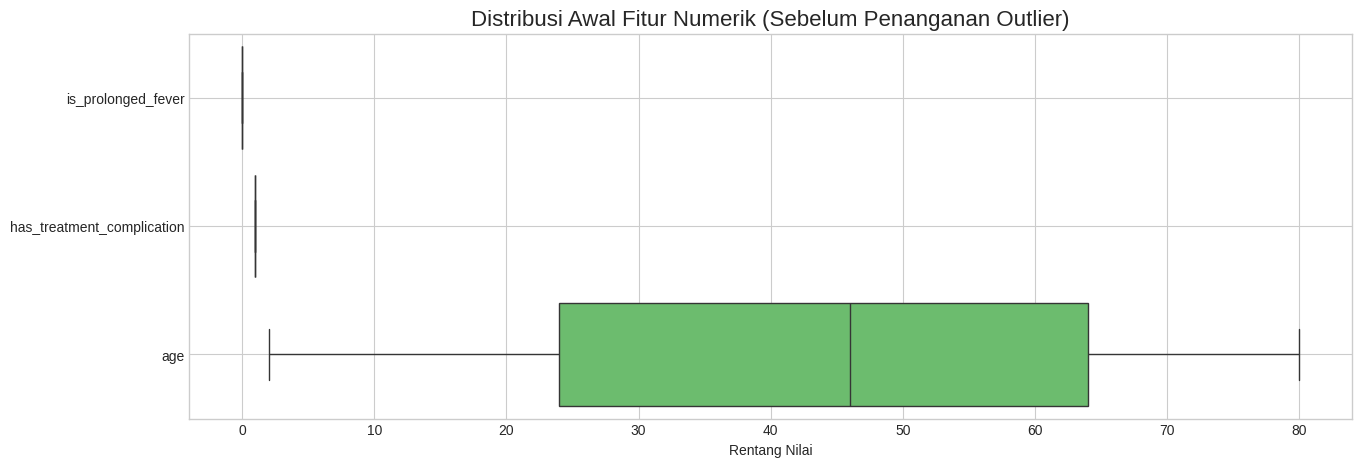


✅ Tidak ditemukan outlier signifikan pada data latih.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 BERHASIL: Outlier ditangani dengan metodologi yang transparan dan terverifikasi.


In [8]:
# =============================================================================
# STEP 7: PENANGANAN OUTLIER (ANALISIS & EKSEKUSI)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("🚀 MEMULAI STEP 7: PENANGANAN OUTLIER (METODE IQR)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI HELPER
# =============================================================================

def analyze_outliers_detailed(X_train):
    """
    Menganalisis outlier secara mendalam HANYA pada data latih, lengkap dengan
    laporan dan visualisasi awal.
    """
    print("--- 7.1: Menganalisis Outlier (Hanya dari Data Latih) ---")

    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
    if not numerical_cols:
        print("✅ Tidak ada kolom numerik untuk dianalisis outliernya.")
        return None, None

    print(f"   - Menganalisis {len(numerical_cols)} kolom numerik...")

    # --- Visualisasi Awal: Boxplot Semua Fitur Numerik ---
    plt.figure(figsize=(15, max(5, len(numerical_cols) * 0.4)))
    sns.boxplot(data=X_train[numerical_cols], orient='h', palette='viridis')
    plt.title('Distribusi Awal Fitur Numerik (Sebelum Penanganan Outlier)', fontsize=16)
    plt.xlabel('Rentang Nilai')
    plt.grid(True)
    plt.show()

    # --- Laporan Detail per Kolom ---
    outlier_report_list = []
    outlier_boundaries = {}

    for col in numerical_cols:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_boundaries[col] = (lower_bound, upper_bound)
        outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)]

        if not outliers.empty:
            outlier_report_list.append({
                'Kolom': col,
                'Jumlah Outlier': len(outliers),
                '% dari Data Latih': f"{(len(outliers) / len(X_train) * 100):.2f}%",
                'Batas Bawah': f"{lower_bound:.2f}",
                'Batas Atas': f"{upper_bound:.2f}",
                'Nilai Outlier (Contoh)': list(outliers[col].head(3).round(2))
            })

    if not outlier_report_list:
        print("\n✅ Tidak ditemukan outlier signifikan pada data latih.")
        return None, None

    outlier_df = pd.DataFrame(outlier_report_list).sort_values(by='Jumlah Outlier', ascending=False)
    print("\n   - Laporan Outlier yang Terdeteksi:")
    display(outlier_df.style.bar(subset=['Jumlah Outlier'], color='coral'))

    return outlier_df, outlier_boundaries

def cap_outliers(df, boundaries):
    """Menerapkan capping (memangkas) outlier berdasarkan batas yang telah ditentukan."""
    df_capped = df.copy()
    for col, (lower, upper) in boundaries.items():
        if col in df_capped.columns:
            # Menggunakan .clip() dari pandas yang lebih efisien
            df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

def verify_capping_detailed(X_before, X_after, outlier_report):
    """Membuat visualisasi perbandingan sebelum dan sesudah capping."""
    print("\n--- 7.3: Verifikasi Hasil Capping (Secara Visual) ---")

    # Ambil kolom dengan outlier terbanyak sebagai sampel verifikasi
    sample_col = outlier_report.iloc[0]['Kolom']

    display(Markdown(f"#### Verifikasi Visual pada Kolom Paling Terdampak: `{sample_col}`"))

    # Visualisasi Boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(y=X_before[sample_col], ax=axes[0]).set_title('Sebelum Capping (Boxplot)')
    sns.boxplot(y=X_after[sample_col], ax=axes[1]).set_title('Setelah Capping (Boxplot)')
    plt.suptitle(f"Dampak Capping pada Fitur '{sample_col}'", fontsize=16)
    plt.show()

    # Visualisasi Distribusi
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(X_before[sample_col], kde=True, ax=axes[0], color='blue').set_title('Sebelum Capping (Distribusi)')
    sns.histplot(X_after[sample_col], kde=True, ax=axes[1], color='green').set_title('Setelah Capping (Distribusi)')
    plt.show()

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_imputed' in locals():
        # TAHAP 1: ANALISIS OUTLIER DENGAN LAPORAN LENGKAP
        outlier_report, outlier_boundaries = analyze_outliers_detailed(X_train_imputed)

        # Jika tidak ada outlier, cukup salin data dan selesaikan step ini
        if outlier_report is None:
            X_train_processed = X_train_imputed.copy()
            X_test_processed = X_test_imputed.copy()
        else:
            # TAHAP 2: EKSEKUSI CAPPING
            print("\n--- 7.2: Mengeksekusi Capping Outlier (Metodologi Anti-Leakage) ---")
            print("   - Batas outlier yang dipelajari dari data latih akan diterapkan ke data latih dan uji.")

            X_train_processed = cap_outliers(X_train_imputed, outlier_boundaries)
            X_test_processed = cap_outliers(X_test_imputed, outlier_boundaries)
            print("   - ✅ Capping selesai.")

            # TAHAP 3: VERIFIKASI DENGAN VISUALISASI LENGKAP
            verify_cpping_detailed(X_train_imputed, X_train_processed, outlier_report)

        print("\n" + "🎉"*60)
        print("STEP 7 BERHASIL: Outlier ditangani dengan metodologi yang transparan dan terverifikasi.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 7 karena `X_train_imputed` dari Step 6 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 7: {e}")

## Step 8: Rekayasa Fitur, Encoding, dan Scaling

### Apa yang dilakukan?
Ini adalah tahap transformasi data yang krusial, di mana semua fitur disiapkan untuk dimasukkan ke dalam model. Proses ini terdiri dari tiga aktivitas utama, yang semuanya "belajar" parameter **hanya dari data latih** untuk mencegah kebocoran data:
1.  **Rekayasa Fitur (*Feature Engineering*)**: Kode ini membuat fitur-fitur baru yang berpotensi lebih informatif, seperti `symptom_score` (jumlah total gejala yang dialami) dan `age_group` (mengelompokkan umur ke dalam kategori seperti remaja, dewasa, dll.).
2.  **Encoding Kategorikal**: Mengubah semua fitur non-numerik (misalnya, `sex` yang berisi 'male'/'female') menjadi representasi numerik menggunakan **One-Hot Encoding**. Ini menciptakan kolom-kolom baru (kolom *dummy*) untuk setiap nilai unik.
3.  **Scaling Numerik**: Menyamakan skala atau rentang nilai dari semua fitur numerik menggunakan **`StandardScaler`**. Ini mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

### Untuk apa?
Tujuannya adalah untuk mengubah dataset yang sudah bersih menjadi format matriks numerik yang sepenuhnya siap untuk diproses oleh algoritma *machine learning*. Ini memastikan semua fitur berada dalam format dan skala yang sebanding, sehingga model dapat mempelajari polanya secara efektif.

### Kenapa perlu?
* **Model Bekerja dengan Angka**: Algoritma *machine learning* pada dasarnya adalah fungsi matematika; mereka tidak dapat memproses teks seperti 'male' atau 'female'. **Encoding** adalah langkah wajib untuk menerjemahkan data kategorikal menjadi angka.
* **Mencegah Dominasi Fitur**: Tanpa **scaling**, fitur dengan rentang nilai yang besar (misalnya, `platelet_count` yang bisa mencapai ratusan ribu) akan dianggap lebih "penting" oleh model daripada fitur dengan rentang kecil (misalnya `symptom_score` yang hanya 0-5). Scaling memastikan setiap fitur memberikan kontribusi yang adil pada proses pembelajaran.
* **Menemukan Pola Tersembunyi**: **Rekayasa fitur** dapat secara eksplisit menyajikan informasi yang mungkin sulit ditemukan oleh model. Misalnya, `symptom_score` secara langsung memberitahu model tentang tingkat keparahan gejala secara keseluruhan, yang bisa jadi merupakan prediktor yang lebih kuat daripada masing-masing gejala secara terpisah.

### Jurnal Acuan
* **Zheng, A., & Casari, A. (2018).** *Feature engineering for machine learning: principles and techniques for data scientists*. O'Reilly Media, Inc.
    *(Meskipun ini buku, ini adalah referensi standar industri yang sangat dihormati. Ini memberikan landasan kuat untuk justifikasi rekayasa fitur seperti pembuatan `symptom_score` dan `age_group`.)*
* **Saranya, C., & Manikandan, G. (2013).** A study on feature scaling techniques for machine learning algorithms. *International Journal of Computer Applications*, 84(11).
    *(Jurnal ini membahas berbagai teknik feature scaling, termasuk standardisasi (yang Anda gunakan dengan StandardScaler), dan menjelaskan mengapa langkah ini penting untuk banyak algoritma machine learning, terutama yang berbasis jarak atau gradien.)*

In [9]:
# =============================================================================
# STEP 8: FINAL PRE-PROCESSING (ENGINEERING, ENCODING, SCALING)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display

print("\n" + "="*80)
print("🚀 MEMULAI STEP 8: FINAL PRE-PROCESSING DENGAN COLUMNTRANSFORMER")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UNTUK REKAYASA FITUR AGREGAT
# =============================================================================

def create_symptom_score(df):
    """Menghitung jumlah gejala dari daftar kolom yang telah ditentukan."""
    symptom_score = (df == 'yes').sum(axis=1)
    return symptom_score.to_frame('symptom_score')

def create_age_group(df):
    """Mengelompokkan umur ke dalam beberapa kategori."""
    if 'age' not in df.columns or df.empty:
        return pd.DataFrame(index=df.index)
    age_group = pd.cut(df['age'], bins=[0, 18, 40, 65, np.inf], labels=[0, 1, 2, 3], include_lowest=True, right=True)
    return age_group.to_frame('age_group')

# =============================================================================
# BAGIAN B: FUNGSI UNTUK MEMBANGUN PREPROCESSOR
# =============================================================================

def build_preprocessor(X_train):
    """
    Membuat objek preprocessor (ColumnTransformer) dan mengembalikan daftar
    kolom yang digunakan untuk setiap langkah transformasi.
    """
    print("--- 8.1: Mendefinisikan Kolom dan Pipeline Transformasi ---")

    # Identifikasi tipe kolom secara dinamis
    all_categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    all_numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Validasi kolom yang akan direkayasa fiturnya
    potential_symptom_cols = ['chills', 'sore_throat', 'rectal_pain_or_pain_on_defecation', 'headache', 'myalgia']
    existing_symptom_cols = [col for col in potential_symptom_cols if col in X_train.columns]
    existing_age_col = ['age'] if 'age' in X_train.columns else []

    # Pisahkan kolom agar tidak diproses ganda
    cat_cols_for_ohe = [col for col in all_categorical_cols if col not in existing_symptom_cols]
    num_cols_for_scaling = [col for col in all_numerical_cols if col not in existing_age_col]

    print(f"   - Ditemukan {len(existing_symptom_cols)} kolom gejala untuk 'symptom_score'.")
    print(f"   - Ditemukan {len(cat_cols_for_ohe)} kolom kategorikal lain untuk di-encode.")
    print(f"   - Ditemukan {len(num_cols_for_scaling)} kolom numerik lain untuk di-scaling.")

    # Definisikan transformer
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8)
    numerical_transformer = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('symptom_score_eng', FunctionTransformer(create_symptom_score), existing_symptom_cols),
            ('age_group_eng', FunctionTransformer(create_age_group), existing_age_col),
            ('cat_encoding', categorical_transformer, cat_cols_for_ohe),
            ('num_scaling', numerical_transformer, num_cols_for_scaling)
        ],
        remainder='passthrough'
    )

    print("✅ Preprocessor berhasil dibuat.")
    return preprocessor, cat_cols_for_ohe, num_cols_for_scaling

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_processed' in locals():
        X_train_input = X_train_processed
        X_test_input = X_test_processed

        # 1. Buat preprocessor dan dapatkan daftar kolomnya
        preprocessor, cat_cols_for_ohe, num_cols_for_scaling = build_preprocessor(X_train_input)

        # 2. Fit & Transform
        print("\n--- 8.2: Menjalankan Fit & Transform ---")
        print("   - BELAJAR (fit) parameter HANYA dari data latih...")
        preprocessor.fit(X_train_input)
        print("     ✅ Parameter (kategori, skala, dll.) berhasil dipelajari.")

        print("   - MENERAPKAN (transform) transformasi secara konsisten...")
        X_train_final_np = preprocessor.transform(X_train_input)
        X_test_final_np = preprocessor.transform(X_test_input)
        print("     ✅ Data latih dan uji berhasil ditransformasi.")

        # 3. Membangun Nama Fitur Akhir Secara Manual
        print("\n--- 8.3: Membangun Nama Fitur Akhir ---")

        # Nama dari FunctionTransformer (didefinisikan manual)
        eng_feature_names = []
        if preprocessor.named_transformers_['symptom_score_eng'] != 'drop': eng_feature_names.append('symptom_score')
        if preprocessor.named_transformers_['age_group_eng'] != 'drop': eng_feature_names.append('age_group')

        # Nama dari OneHotEncoder (diambil dari transformer)
        ohe_feature_names = list(preprocessor.named_transformers_['cat_encoding'].get_feature_names_out(cat_cols_for_ohe))

        # Nama dari StandardScaler (sama dengan nama kolom asli)
        scaled_feature_names = num_cols_for_scaling

        # Gabungkan semua nama fitur sesuai urutan di ColumnTransformer
        final_feature_names = eng_feature_names + ohe_feature_names + scaled_feature_names

        # Konversi kembali ke DataFrame Pandas
        X_train_final = pd.DataFrame(X_train_final_np, index=X_train_input.index, columns=final_feature_names)
        X_test_final = pd.DataFrame(X_test_final_np, index=X_test_input.index, columns=final_feature_names)
        print("   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.")

        # --- Laporan Akhir ---
        print("\n" + "📋"*40); print("LAPORAN AKHIR UNTUK STEP 8"); print("📋"*40)
        print(f"\n   - Bentuk X_train_final: {X_train_final.shape}\n   - Bentuk X_test_final:  {X_test_final.shape}")
        if X_train_final.shape[1] == X_test_final.shape[1]:
            print("   ✅ Jumlah kolom konsisten antara data latih dan uji.")

        print("\n" + "🏁"*60)
        print("STEP 8 BERHASIL: Data 100% siap untuk dimasukkan ke dalam model.")
        print("🏁"*60)
        print("Contoh hasil akhir data (X_train_final):")
        display(X_train_final.head())
        print("="*80)

    else:
        # Perbarui pesan error agar merujuk ke Step 7
        print("🛑 Gagal menjalankan Step 8. Pastikan Step 7 sudah dijalankan dan variabel `X_train_processed` telah dibuat.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 8: {e}")


🚀 MEMULAI STEP 8: FINAL PRE-PROCESSING DENGAN COLUMNTRANSFORMER
--- 8.1: Mendefinisikan Kolom dan Pipeline Transformasi ---
   - Ditemukan 2 kolom gejala untuk 'symptom_score'.
   - Ditemukan 2 kolom kategorikal lain untuk di-encode.
   - Ditemukan 2 kolom numerik lain untuk di-scaling.
✅ Preprocessor berhasil dibuat.

--- 8.2: Menjalankan Fit & Transform ---
   - BELAJAR (fit) parameter HANYA dari data latih...
     ✅ Parameter (kategori, skala, dll.) berhasil dipelajari.
   - MENERAPKAN (transform) transformasi secara konsisten...
     ✅ Data latih dan uji berhasil ditransformasi.

--- 8.3: Membangun Nama Fitur Akhir ---
   ✅ DataFrame akhir dengan nama kolom yang benar berhasil dibuat.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
LAPORAN AKHIR UNTUK STEP 8
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋

   - Bentuk X_train_final: (400, 8)
   - Bentuk X_test_final:  (100, 8)
   ✅ Jumlah kolom konsisten antara data latih dan uji.

🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁🏁
S

,symptom_score,age_group,lymphadenopathy_no,lymphadenopathy_yes,sex_female,sex_male,is_prolonged_fever,has_treatment_complication
312,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
51,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
356,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0
226,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
199,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0


## Step 9: Encoding Variabel Target

### Apa yang dilakukan?
Tahap ini secara khusus memproses **variabel target** (kolom `diagnosing` yang berisi 'yes' dan 'no'). Kode ini menggunakan `LabelEncoder` untuk mengubah label tekstual tersebut menjadi representasi numerik (misalnya, 'no' menjadi `0` dan 'yes' menjadi `1`). Proses "belajar" pemetaan ini (`fit`) dilakukan **hanya pada data latih**, dan pemetaan yang sama kemudian diterapkan secara konsisten ke data latih dan data uji (`transform`).

### Untuk apa?
Tujuannya adalah untuk mengubah "kunci jawaban" dari format teks ke format numerik yang dapat dipahami dan diproses oleh algoritma *machine learning*.

### Kenapa perlu?
Model *machine learning*, pada intinya, adalah fungsi matematika yang bekerja dengan angka. Mereka tidak bisa menghitung *error* atau melakukan optimisasi menggunakan nilai teks seperti 'yes' atau 'no'. **Encoding** adalah langkah wajib untuk menerjemahkan target kelas menjadi format numerik sehingga model dapat dilatih dan dievaluasi. Menggunakan alur kerja `fit` hanya pada data latih dan `transform` pada semua set data memastikan bahwa pemetaan dari teks ke angka (misalnya, 'yes' selalu menjadi `1`) konsisten di seluruh *pipeline*, mencegah kebingungan atau error pada tahap evaluasi.

### Jurnal Acuan
* **Hancock, J. T., & Khoshgoftaar, T. M. (2020).** CatBoost for big data: a survey. *Journal of Big Data*, 7(1), 1-41.
    *(Jurnal seperti ini, yang mengulas algoritma klasifikasi, secara implisit mengasumsikan bahwa variabel target berbentuk numerik agar fungsi loss dapat dihitung. Ini mendukung justifikasi bahwa encoding variabel target adalah langkah preprocessing yang fundamental dan diperlukan sebelum melatih model klasifikasi.)*
* **Pedregosa, F., et al. (2011).** Scikit-learn: Machine learning in Python. *Journal of machine learning research*, 12, 2825-2830.
    *(Paper yang memperkenalkan pustaka scikit-learn ini, secara tidak langsung, menjadi landasan untuk penggunaan alat-alat standar seperti LabelEncoder. Ini menunjukkan bahwa proses encoding adalah bagian integral dan praktik standar dari pipeline machine learning yang diimplementasikan menggunakan pustaka ini.)*

In [10]:
# =============================================================================
# STEP 9: ENCODING VARIABEL TARGET (y)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from sklearn.preprocessing import LabelEncoder

print("\n" + "="*80)
print("🚀 MEMULAI STEP 9: ENCODING VARIABEL TARGET (y)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step9_target_encoding(y_train, y_test):
    """
    Melakukan encoding pada variabel target (y_train dan y_test) menggunakan
    metodologi fit/transform untuk menjamin konsistensi.
    """
    POSITIVE_LABEL = 'yes'  # Label yang kita anggap sebagai kelas positif
    le = LabelEncoder()

    # --- 9.1: Belajar (Fit) dan Menerapkan (Transform) pada Data Latih ---
    print("--- 9.1: Belajar pemetaan label dari data latih (y_train)... ---")
    # Encoder 'mempelajari' pemetaan dari data latih dan langsung menerapkannya.
    y_train_encoded = le.fit_transform(y_train)
    print("   ✅ Pemetaan dipelajari dan diterapkan pada y_train.")

    # --- 9.2: Menerapkan Transformasi pada Data Uji ---
    print("\n--- 9.2: Menerapkan pemetaan yang sama pada data uji (y_test)... ---")
    # Encoder menggunakan pemetaan yang SUDAH DIPELAJARI untuk mengubah data uji.
    y_test_encoded = le.transform(y_test)
    print("   ✅ Transformasi konsisten diterapkan pada y_test.")

    # --- 9.3: Laporan Hasil Encoding ---
    print("\n--- 9.3: Laporan Hasil Encoding ---")
    print("   Pemetaan Label yang Dipelajari:")

    positive_class_index = None
    for index, label in enumerate(le.classes_):
        print(f"   - '{label}'  ->  {index}")
        if str(label).lower() == POSITIVE_LABEL:
            positive_class_index = index

    if positive_class_index is not None:
        print(f"\n   - Kelas positif ('{POSITIVE_LABEL}') direpresentasikan sebagai: {positive_class_index}")
    else:
        print(f"\n   - ⚠️ PERINGATAN: Label kelas positif ('{POSITIVE_LABEL}') tidak ditemukan.")

    return y_train_encoded, y_test_encoded, le # Kembalikan juga encoder-nya

# --- Eksekusi Utama ---
try:
    if 'y_train' in locals() and 'y_test' in locals():
        y_train_encoded, y_test_encoded, label_encoder = run_step9_target_encoding(y_train, y_test)

        print("\nBentuk Data Target Setelah Encoding:")
        print(f"   - y_train_encoded shape: {y_train_encoded.shape}")
        print(f"   - y_test_encoded shape:  {y_test_encoded.shape}")

        print("\n" + "🎉"*60)
        print("STEP 9 BERHASIL: Variabel target kini dalam format numerik dan siap untuk pemodelan.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 9 karena y_train dan y_test dari Step 3 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 9: {e}")


🚀 MEMULAI STEP 9: ENCODING VARIABEL TARGET (y)
--- 9.1: Belajar pemetaan label dari data latih (y_train)... ---
   ✅ Pemetaan dipelajari dan diterapkan pada y_train.

--- 9.2: Menerapkan pemetaan yang sama pada data uji (y_test)... ---
   ✅ Transformasi konsisten diterapkan pada y_test.

--- 9.3: Laporan Hasil Encoding ---
   Pemetaan Label yang Dipelajari:
   - 'no'  ->  0
   - 'yes'  ->  1

   - Kelas positif ('yes') direpresentasikan sebagai: 1

Bentuk Data Target Setelah Encoding:
   - y_train_encoded shape: (400,)
   - y_test_encoded shape:  (100,)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 9 BERHASIL: Variabel target kini dalam format numerik dan siap untuk pemodelan.


## Step 10: Pembersihan Fitur Akhir Berdasarkan Korelasi

### Apa yang dilakukan?
Tahap ini melakukan seleksi fitur tambahan dengan metode berbasis filter. Secara spesifik, kode ini menghitung **koefisien korelasi Pearson** antara setiap fitur numerik dengan variabel target. Proses ini dilakukan **hanya pada data latih** untuk mencegah kebocoran data. Fitur-fitur yang memiliki korelasi absolut (nilai positif maupun negatif) di atas ambang batas yang ditentukan (0.60) kemudian diidentifikasi dan dihapus dari data latih dan data uji.

### Untuk apa?
Tujuannya adalah untuk menghilangkan fitur-fitur yang memiliki hubungan linier yang sangat kuat dengan variabel target. Ini berfungsi sebagai lapisan pertahanan terakhir untuk mendeteksi potensi kebocoran data (*data leakage*) yang mungkin tidak tertangkap pada Step 4, serta untuk mengurangi redundansi dalam set fitur.

### Kenapa perlu?
Meskipun korelasi yang tinggi seringkali menandakan fitur yang baik, korelasi yang **terlalu tinggi** bisa menjadi pertanda masalah:
1.  **Indikasi Kebocoran Data**: Fitur dengan korelasi yang mendekati sempurna (misalnya, > 0.9) seringkali merupakan "fitur bocor". Artinya, fitur tersebut mengandung informasi tentang target yang seharusnya tidak diketahui pada saat prediksi. Menghapusnya adalah langkah krusial untuk memastikan evaluasi model yang adil.
2.  **Mengurangi Redundansi**: Fitur yang sangat berkorelasi dengan target mungkin juga sangat berkorelasi dengan fitur-fitur lain yang sudah ada. Menghapusnya dapat menyederhanakan model tanpa kehilangan banyak informasi prediktif, yang berpotensi meningkatkan kemampuan generalisasi.
3.  **Stabilitas Model**: Terkadang, model dapat menjadi terlalu bergantung pada satu atau dua fitur dengan korelasi yang sangat kuat. Menghapusnya memaksa model untuk belajar dari pola yang lebih beragam di seluruh fitur yang tersedia, yang dapat membuatnya lebih robust.

### Jurnal Acuan
* **Hall, M. A. (1999).** Correlation-based feature selection for machine learning. *The University of Waikato, Department of Computer Science*.
    *(Meskipun ini adalah disertasi, ini adalah salah satu karya paling fundamental dan sering dikutip yang memperkenalkan Correlation-based Feature Selection (CFS). Ini memberikan landasan teoretis yang kuat mengapa mengevaluasi fitur berdasarkan korelasinya (baik dengan target maupun dengan fitur lain) adalah strategi seleksi fitur yang efektif.)*
* **Chandrashekar, G., & Sahin, F. (2014).** A survey on feature selection methods. *Computers & Electrical Engineering*, 40(1), 16-28.
    *(Jurnal ini mengulas berbagai metode seleksi fitur dan mengkategorikan metode berbasis korelasi sebagai "metode filter". Ini mendukung pendekatan Anda sebagai salah satu teknik standar dalam machine learning untuk pra-pemrosesan data.)*

In [11]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd

print("\n" + "="*80)
print("🚀 MEMULAI STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step10_correlation_cleaning(X_train, X_test, y_train, correlation_threshold=0.60):
    """
    Menganalisis korelasi fitur terhadap target pada data latih, dan menghapus
    fitur dengan korelasi tinggi dari kedua set data (latih dan uji).
    """
    # --- 10.1: Analisis Korelasi (Hanya pada Data Latih) ---
    print(f"--- 10.1: Menganalisis Korelasi Fitur vs Target (Threshold > {correlation_threshold}) ---")
    print("   - Metodologi Anti-Leakage: Korelasi dihitung HANYA pada data latih.")

    # Gabungkan X_train dan y_train untuk menghitung korelasi
    target_series = pd.Series(y_train, index=X_train.index, name='TARGET')
    df_corr_check = pd.concat([X_train, target_series], axis=1)

    # Hitung korelasi absolut dan hapus target itu sendiri
    corr_with_target = df_corr_check.corr(numeric_only=True)['TARGET'].abs().drop(labels=['TARGET'])

    # Identifikasi fitur yang akan dihapus
    features_to_drop = corr_with_target[corr_with_target > correlation_threshold].index.tolist()

    # --- 10.2: Eksekusi Penghapusan Fitur ---
    if not features_to_drop:
        print("\n✅ Tidak ada fitur yang melebihi ambang batas korelasi.")
        print("   - Data dari langkah sebelumnya akan digunakan tanpa perubahan.")
        return X_train, X_test # Kembalikan data asli

    print(f"\n   - Ditemukan {len(features_to_drop)} fitur dengan korelasi absolut > {correlation_threshold} untuk dihapus.")
    print("\n   --- Laporan Fitur yang Dihapus (diurutkan berdasarkan korelasi) ---")
    print(corr_with_target[features_to_drop].sort_values(ascending=False).to_string())

    print("\n--- 10.2: Menerapkan Penghapusan Fitur ---")
    print("   - Menghapus fitur-fitur ini secara konsisten dari set data latih dan uji...")

    X_train_clean = X_train.drop(columns=features_to_drop, errors='ignore')
    X_test_clean = X_test.drop(columns=features_to_drop, errors='ignore')

    print("   - ✅ Penghapusan fitur selesai.")

    return X_train_clean, X_test_clean

# --- Eksekusi Utama ---
try:
    if 'X_train_final' in locals() and 'y_train_encoded' in locals():
        X_train_clean, X_test_clean = run_step10_correlation_cleaning(
            X_train_final, X_test_final, y_train_encoded, correlation_threshold=0.60
        )

        print("\n--- Ukuran Data Baru Setelah Pembersihan ---")
        print(f"   - Bentuk X_train_clean: {X_train_clean.shape} (Sebelumnya: {X_train_final.shape})")
        print(f"   - Bentuk X_test_clean:  {X_test_clean.shape} (Sebelumnya: {X_test_final.shape})")

        print("\n" + "🎉"*60)
        print("STEP 10 BERHASIL: Pembersihan fitur berdasarkan korelasi selesai.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 10 karena data (`X_train_final`, dll.) dari Step 8 & 9 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 10: {e}")


🚀 MEMULAI STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI
--- 10.1: Menganalisis Korelasi Fitur vs Target (Threshold > 0.6) ---
   - Metodologi Anti-Leakage: Korelasi dihitung HANYA pada data latih.

✅ Tidak ada fitur yang melebihi ambang batas korelasi.
   - Data dari langkah sebelumnya akan digunakan tanpa perubahan.

--- Ukuran Data Baru Setelah Pembersihan ---
   - Bentuk X_train_clean: (400, 8) (Sebelumnya: (400, 8))
   - Bentuk X_test_clean:  (100, 8) (Sebelumnya: (100, 8))

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 10 BERHASIL: Pembersihan fitur berdasarkan korelasi selesai.


## Step 11: Penyeimbangan Data Latih dengan SMOTE

### Apa yang dilakukan?
Tahap ini secara khusus menangani masalah **kelas tidak seimbang** (*imbalanced class*) yang ada di dalam data latih. Kode ini menggunakan algoritma **SMOTE (Synthetic Minority Over-sampling Technique)** untuk menyeimbangkan distribusi kelas. Prosesnya adalah dengan menciptakan sampel-sampel data "sintetis" atau "buatan" baru untuk kelas minoritas (dalam kasus ini, kemungkinan besar adalah kelas 'yes' untuk diagnosis Monkeypox) hingga jumlahnya seimbang dengan kelas mayoritas. Penting untuk dicatat, proses ini **hanya diterapkan pada data latih**, sementara data uji tetap tidak tersentuh.

### Untuk apa?
Tujuannya adalah untuk mencegah model *machine learning* menjadi bias atau "berat sebelah" terhadap kelas mayoritas. Dengan menyediakan jumlah data yang seimbang untuk setiap kelas, kita memaksa model untuk mempelajari karakteristik dari kelas minoritas sama baiknya dengan kelas mayoritas.

### Kenapa perlu?
Dalam banyak dataset medis, jumlah pasien yang sakit (kelas minoritas) seringkali jauh lebih sedikit daripada jumlah pasien yang sehat (kelas mayoritas). Jika model dilatih pada data yang tidak seimbang ini, ia bisa mencapai akurasi yang tinggi secara artifisial hanya dengan selalu menebak kelas mayoritas. Tentu saja, model seperti ini tidak berguna karena ia akan kesulitan mendeteksi penyakit yang sebenarnya ingin kita prediksi.

SMOTE mengatasi masalah ini dengan "memperbanyak" contoh kasus minoritas secara cerdas, sehingga saat training, model mendapatkan kesempatan yang sama untuk belajar dari kedua kelas. Menerapkan SMOTE **hanya pada data latih** adalah aturan fundamental untuk menjaga validitas evaluasi. Jika kita juga menerapkannya pada data uji, artinya kita menguji model pada data buatan, yang akan menghasilkan skor performa yang terlalu optimis dan tidak mencerminkan kemampuannya di dunia nyata.

### Jurnal Acuan
* **Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002).** SMOTE: synthetic minority over-sampling technique. *Journal of artificial intelligence research*, 16, 321-357.
    *(Ini adalah **paper orisinal dan paling fundamental** yang memperkenalkan teknik SMOTE. Mengutip jurnal ini adalah landasan terkuat untuk justifikasi Anda, karena Anda menggunakan metode yang mereka usulkan secara langsung untuk menangani masalah kelas tidak seimbang, yang merupakan tantangan umum dalam data medis.)*

In [12]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH DENGAN SMOTE (OVERSAMPLING)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

print("\n" + "="*80)
print("🚀 MEMULAI STEP 11: MENYEIMBANGKAN DATA LATIH MENGGUNAKAN SMOTE")
print("="*80)

# =============================================================================
# Catatan Metodologi (Sangat Penting):
# 1. HANYA PADA DATA LATIH: SMOTE hanya diterapkan pada data latih.
#    Data uji (test set) HARUS tetap dalam kondisi aslinya (tidak seimbang)
#    untuk mensimulasikan evaluasi pada data dunia nyata yang sebenarnya.
#    Mengubah data uji akan menghasilkan skor evaluasi yang tidak valid.
# 2. Reproducibility: `random_state` digunakan dalam SMOTE untuk memastikan
#    sampel sintetis yang sama persis dihasilkan setiap kali kode dijalankan,
#    membuat seluruh eksperimen dapat direproduksi.
# =============================================================================

# =============================================================================
# BAGIAN A: FUNGSI UTAMA & EKSEKUSI
# =============================================================================

def run_step11_smote_oversampling(X_train, y_train, random_state=123):
    """
    Menerapkan SMOTE HANYA pada data latih untuk menyeimbangkan distribusi kelas.
    """
    original_columns = X_train.columns

    # --- 11.1: Analisis Distribusi Awal ---
    print("--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---")
    unique_before, counts_before = np.unique(y_train, return_counts=True)
    print(f"   - Distribusi kelas pada y_train: {dict(zip(unique_before, counts_before))}")

    # --- 11.2: Eksekusi SMOTE ---
    print("\n--- 11.2: Menerapkan SMOTE (Fit & Resample) pada Data Latih ---")

    # Inisialisasi SMOTE dengan random_state untuk hasil yang reproducible
    smote = SMOTE(random_state=random_state)

    # Terapkan SMOTE. Ini adalah operasi 'fit' dan 'resample' dalam satu langkah.
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Mengubah kembali output NumPy menjadi DataFrame dengan nama kolom yang benar
    X_train_smote = pd.DataFrame(X_train_resampled, columns=original_columns)
    y_train_smote = pd.Series(y_train_resampled, name=y_train.name if hasattr(y_train, 'name') else 'TARGET')

    print("   - ✅ Data latih berhasil diseimbangkan.")

    # --- 11.3: Verifikasi Hasil ---
    print("\n--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---")
    unique_after, counts_after = np.unique(y_train_smote, return_counts=True)
    print(f"   - Distribusi kelas setelah SMOTE: {dict(zip(unique_after, counts_after))}")

    print("\n   Perbandingan Ukuran Data Latih:")
    print(f"   - Sebelum SMOTE: {X_train.shape}")
    print(f"   - Setelah SMOTE: {X_train_smote.shape}")

    return X_train_smote, y_train_smote

# --- Eksekusi Utama ---
try:
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():
        X_train_smote, y_train_smote = run_step11_smote_oversampling(
            X_train_clean, y_train_encoded, random_state=PIPELINE_RANDOM_STATE
        )

        print("\n" + "🎉"*60)
        print("STEP 11 BERHASIL: Data latih kini seimbang dan siap untuk training model.")
        print("="*80)
        # Menambahkan kembali catatan penting di akhir output
        print("CATATAN PENTING UNTUK PEMODELAN:")
        print("   - Untuk training & cross-validation, gunakan: `X_train_smote` dan `y_train_smote`.")
        print("   - Untuk evaluasi akhir (final testing), gunakan data uji asli: `X_test_clean` dan `y_test_encoded`.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 11 karena data bersih (`X_train_clean`) dari Step 10 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 11: {e}")


🚀 MEMULAI STEP 11: MENYEIMBANGKAN DATA LATIH MENGGUNAKAN SMOTE
--- 11.1: Menganalisis Distribusi Kelas Sebelum SMOTE ---
   - Distribusi kelas pada y_train: {np.int64(0): np.int64(162), np.int64(1): np.int64(238)}

--- 11.2: Menerapkan SMOTE (Fit & Resample) pada Data Latih ---
   - ✅ Data latih berhasil diseimbangkan.

--- 11.3: Verifikasi Distribusi Kelas Setelah SMOTE ---
   - Distribusi kelas setelah SMOTE: {np.int64(0): np.int64(238), np.int64(1): np.int64(238)}

   Perbandingan Ukuran Data Latih:
   - Sebelum SMOTE: (400, 8)
   - Setelah SMOTE: (476, 8)

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 11 BERHASIL: Data latih kini seimbang dan siap untuk training model.
CATATAN PENTING UNTUK PEMODELAN:
   - Untuk training & cross-validation, gunakan: `X_train_smote` dan `y_train_smote`.
   - Untuk evaluasi akhir (final testing), gunakan data uji asli: `X_test_clean` dan `y_test_encoded`.



🚀 MEMULAI STEP 12: ANALISIS DIAGNOSTIK PADA DATA BERSIH
--- 12.1: Menganalisis Feature Importance (Menggunakan RandomForest) ---


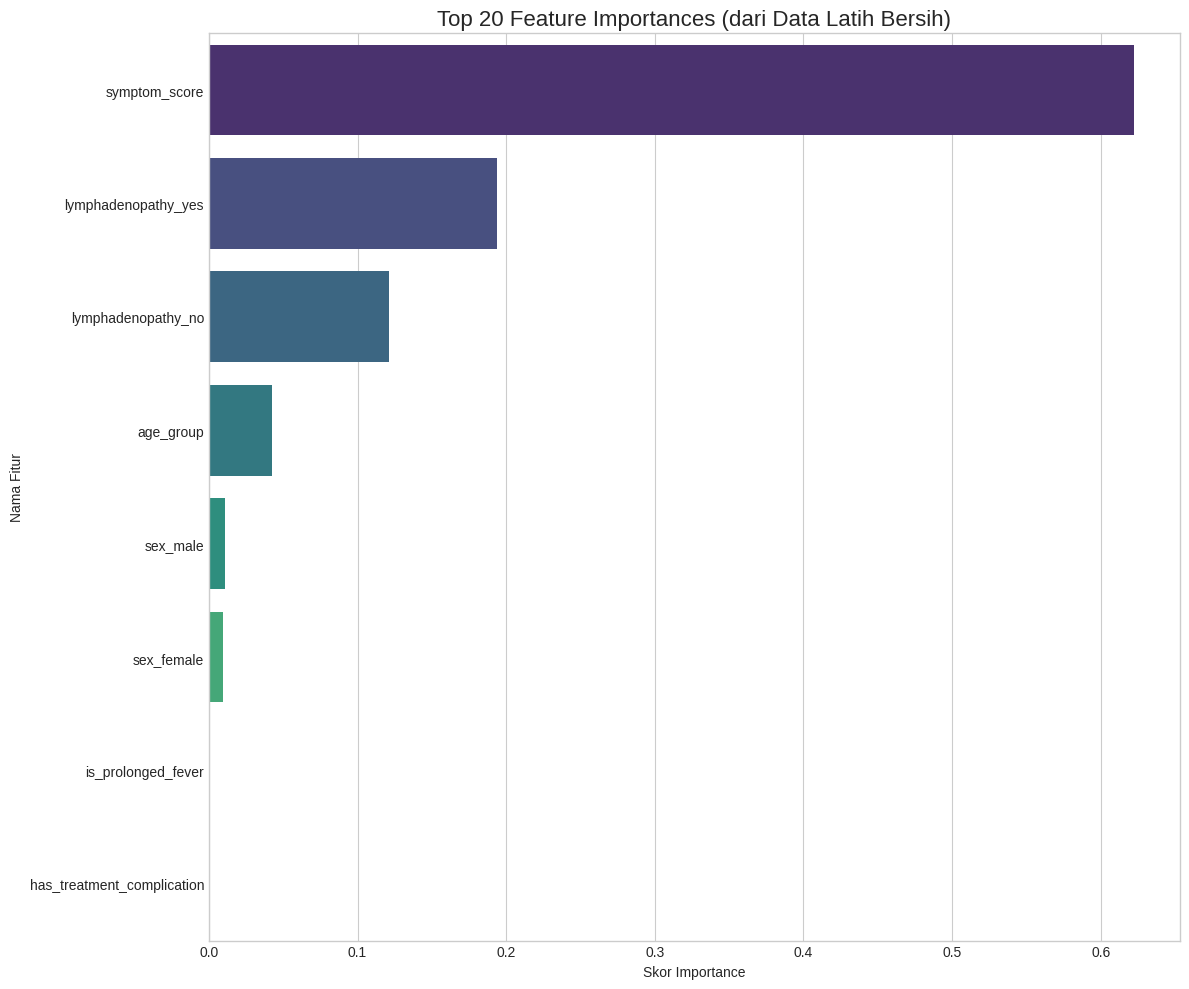


   - Laporan Top 20 Fitur Paling Penting:


,Fitur,Importance
0,symptom_score,0.622234
1,lymphadenopathy_yes,0.193536
2,lymphadenopathy_no,0.120974
3,age_group,0.042690
4,sex_male,0.010854
5,sex_female,0.009712
6,is_prolonged_fever,0.000000
7,has_treatment_complication,0.000000



--------------------------------------------------------------------------------
--- 12.2: Menganalisis Korelasi Fitur vs Target ---

   - Laporan Top 20 Fitur dengan Korelasi Tertinggi Terhadap Target:


,TARGET
symptom_score,0.279491
lymphadenopathy_yes,0.114902
lymphadenopathy_no,0.114902
age_group,0.057211
sex_male,0.019887
sex_female,0.019887
is_prolonged_fever,NaN
has_treatment_complication,NaN


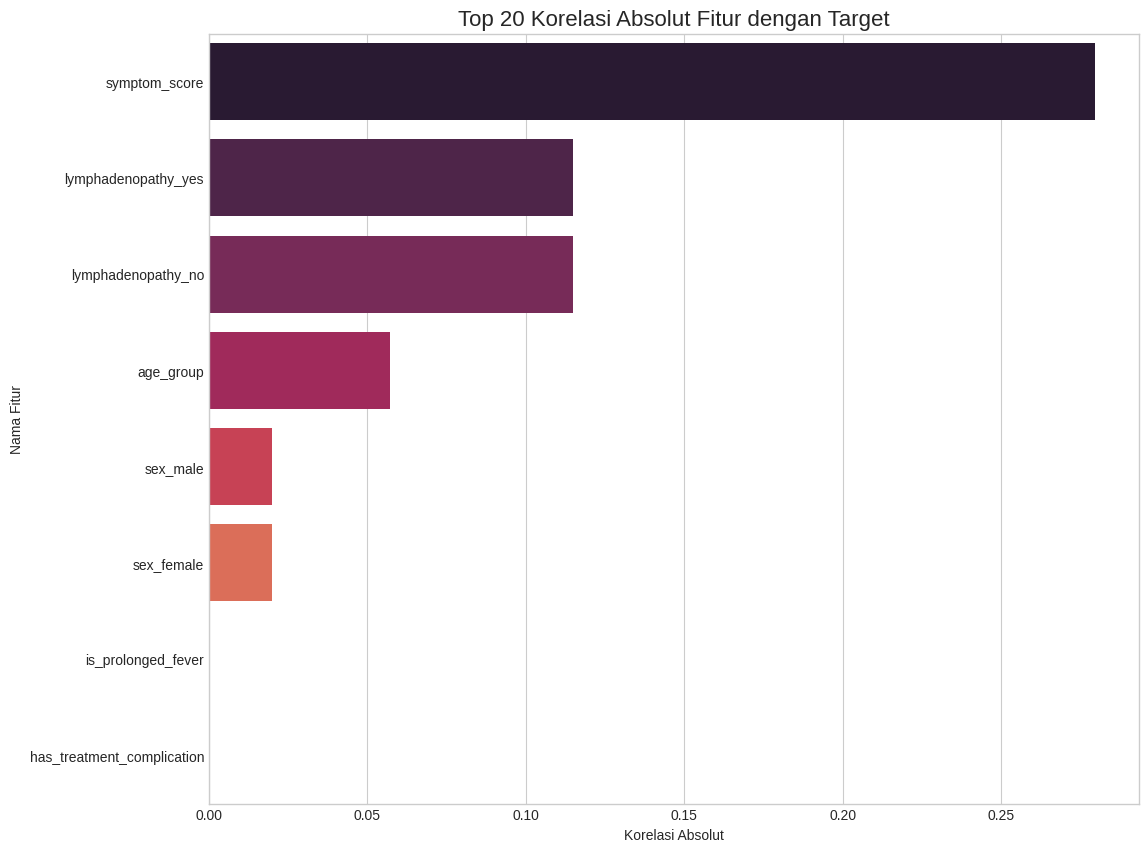


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 12 BERHASIL: Analisis diagnostik pada data bersih selesai.


In [13]:
# =============================================================================
# STEP 12: ANALISIS DIAGNOSTIK PADA DATA BERSIH (FEATURE IMPORTANCE & KORELASI)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "="*80)
print("🚀 MEMULAI STEP 12: ANALISIS DIAGNOSTIK PADA DATA BERSIH")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI ANALISIS
# =============================================================================

def analyze_feature_importance(X_train, y_train):
    """
    Melatih model RandomForest sementara untuk menganalisis dan memvisualisasikan
    feature importance pada data latih yang sudah bersih.
    """
    print("--- 12.1: Menganalisis Feature Importance (Menggunakan RandomForest) ---")

    # Latih model diagnostik
    diagnostic_model = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
    diagnostic_model.fit(X_train, y_train)

    # Buat laporan feature importance
    feature_importances = pd.DataFrame({
        'Fitur': X_train.columns,
        'Importance': diagnostic_model.feature_importances_
    }).sort_values('Importance', ascending=False).reset_index(drop=True)

    top_20_features = feature_importances.head(20)

    # Visualisasi
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Fitur', data=top_20_features, palette='viridis')
    plt.title('Top 20 Feature Importances (dari Data Latih Bersih)', fontsize=16)
    plt.xlabel('Skor Importance')
    plt.ylabel('Nama Fitur')
    plt.tight_layout()
    plt.show()

    print("\n   - Laporan Top 20 Fitur Paling Penting:")
    display(top_20_features)

def analyze_correlation_with_target(X_train, y_train):
    """Menganalisis dan memvisualisasikan korelasi absolut setiap fitur terhadap target."""
    print("\n" + "-"*80)
    print("--- 12.2: Menganalisis Korelasi Fitur vs Target ---")

    # Gabungkan fitur dan target untuk menghitung korelasi
    df_corr_analysis = X_train.copy()
    df_corr_analysis['TARGET'] = y_train

    # Hitung korelasi absolut dengan target, urutkan, dan ambil 20 teratas
    correlation_with_target = df_corr_analysis.corr()['TARGET'].abs().sort_values(ascending=False).drop('TARGET')
    top_20_correlated = correlation_with_target.head(20)

    print("\n   - Laporan Top 20 Fitur dengan Korelasi Tertinggi Terhadap Target:")
    display(top_20_correlated.to_frame())

    # Visualisasi
    plt.figure(figsize=(12, 10))
    sns.barplot(x=top_20_correlated.values, y=top_20_correlated.index, palette='rocket')
    plt.title('Top 20 Korelasi Absolut Fitur dengan Target', fontsize=16)
    plt.xlabel('Korelasi Absolut')
    plt.ylabel('Nama Fitur')
    plt.show()

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    # Gunakan data dari Step 10 (X_train_clean), sebelum di-SMOTE
    if 'X_train_clean' in locals() and 'y_train_encoded' in locals():

        # --- 1. Analisis Feature Importance ---
        analyze_feature_importance(X_train_clean, y_train_encoded)

        # --- 2. Analisis Korelasi ---
        analyze_correlation_with_target(X_train_clean, y_train_encoded)

        print("\n" + "🎉"*60)
        print("STEP 12 BERHASIL: Analisis diagnostik pada data bersih selesai.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 12 karena data bersih (`X_train_clean`) dari Step 10 tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 12: {e}")

## Step 13: Pelatihan, Tuning, dan Evaluasi Model dengan GridSearchCV

### Apa yang dilakukan?
Tahap ini adalah inti dari proses pemodelan. Kode ini secara sistematis melatih tiga model klasifikasi (Random Forest, XGBoost, CatBoost) untuk menemukan versi terbaik dari masing-masing. Proses ini menggunakan `GridSearchCV`, sebuah alat canggih yang melakukan dua tugas penting secara bersamaan:
1.  **Hyperparameter Tuning**: Untuk setiap model, kode ini secara otomatis mencoba berbagai kombinasi "setelan" atau *hyperparameter* (misalnya, `n_estimators`, `max_depth`, dll.) dari daftar kandidat yang telah Anda tentukan.
2.  **5-Fold Cross-Validation**: Selama proses pencarian setelan terbaik, `GridSearchCV` menggunakan metode **5-Fold Cross-Validation** pada data latih. Ini berarti data latih dibagi menjadi 5 bagian, lalu proses training dan validasi diulang sebanyak 5 kali, di mana setiap bagian mendapat giliran menjadi data validasi.

Setelah menemukan kombinasi parameter terbaik, model tersebut dievaluasi satu kali pada **data uji (20%)** untuk mendapatkan laporan performa final.

### Untuk apa?
Tujuannya adalah untuk memastikan bahwa setiap model yang dibangun memiliki konfigurasi yang paling optimal, bukan sekadar menggunakan setelan *default*. Selain itu, penggunaan *cross-validation* bertujuan untuk mendapatkan estimasi performa yang **andal dan stabil**, yang mencerminkan bagaimana model akan berperilaku pada data yang belum pernah dilihat.

### Kenapa perlu?
Ini adalah langkah yang membedakan antara pendekatan *trial-and-error* dengan metodologi penelitian yang sistematis dan robust:
* **Optimalisasi Performa**: Performa sebuah model sangat bergantung pada *hyperparameter*-nya. Mencari kombinasi terbaik secara manual sangat tidak efisien dan seringkali suboptimal. `GridSearchCV` mengotomatiskan proses ini, memastikan kita mendapatkan versi terbaik dari setiap model.
* **Mencegah "Keberuntungan"**: Mengevaluasi model hanya pada satu set validasi bisa menghasilkan skor yang bias karena "kebetulan". Dengan **5-Fold Cross-Validation**, performa model diukur sebanyak lima kali pada bagian data yang berbeda, dan hasilnya dirata-ratakan. Ini memberikan ukuran performa yang jauh lebih bisa diandalkan dan mengurangi risiko melaporkan hasil yang terlalu optimis atau pesimis secara kebetulan. Ini adalah **standar emas** dalam validasi model *machine learning*.

### Jurnal Acuan
* **Arlot, S., & Celisse, A. (2010).** A survey of cross-validation procedures for model selection. *Statistics surveys*, 4, 40-79.
    *(Jurnal ini memberikan ulasan yang sangat mendalam tentang berbagai prosedur cross-validation, termasuk K-Fold CV. Ini adalah landasan teoretis yang kuat untuk justifikasi mengapa cross-validation adalah metode yang superior untuk pemilihan model dan estimasi performa yang andal.)*
* **Bergstra, J., & Bengio, Y. (2012).** Random search for hyper-parameter optimization. *Journal of Machine Learning Research*, 13(2).
    *(Meskipun jurnal ini berfokus pada Random Search, ia secara ekstensif membahas pentingnya hyperparameter optimization. Ini mendukung justifikasi Anda untuk tidak menggunakan parameter default, melainkan secara sistematis mencari setelan terbaik. GridSearchCV adalah salah satu metode sistematis yang paling umum digunakan untuk tujuan ini.)*


🚀 MEMULAI STEP 13: PELATIHAN & EVALUASI MODEL BASELINE (SEMUA FITUR)

🚀 MEMPROSES MODEL BASELINE: RANDOM FOREST
--- 13.1: Mencari Hyperparameter Terbaik (GridSearchCV) ---
   - ✅ Tuning selesai dalam 25.12 detik.
   - Parameter Terbaik: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

--- 13.2: Menganalisis Stabilitas Model (Evaluasi per-Fold CV) ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9271,0.9020,0.9583,0.9293
1,Fold 2,0.9368,0.9200,0.9583,0.9388
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9773,0.9149,0.9451
4,Fold 5,0.9263,0.9167,0.9362,0.9263



   - Ringkasan Statistik Cross-Validation:


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9454,0.9391,0.9535,0.9458
Stdev,0.0261,0.0366,0.0316,0.0256



--- 13.3: Evaluasi Akhir pada Data Uji (Final Test) ---
   - Laporan Klasifikasi pada Data Uji:
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



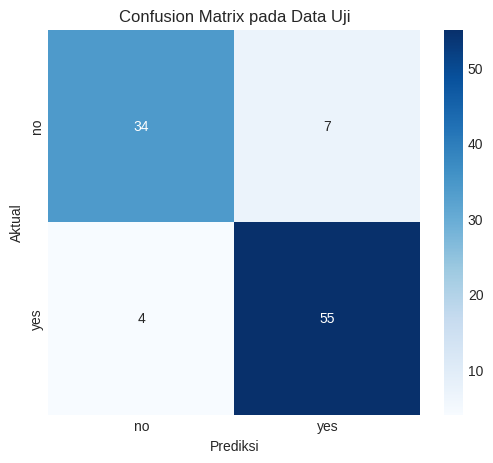


🚀 MEMPROSES MODEL BASELINE: XGBOOST
--- 13.1: Mencari Hyperparameter Terbaik (GridSearchCV) ---
   - ✅ Tuning selesai dalam 1.33 detik.
   - Parameter Terbaik: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

--- 13.2: Menganalisis Stabilitas Model (Evaluasi per-Fold CV) ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9062,0.8679,0.9583,0.9109
1,Fold 2,0.9368,0.9038,0.9792,0.9400
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9565,0.9362,0.9462
4,Fold 5,0.9263,0.9167,0.9362,0.9263



   - Ringkasan Statistik Cross-Validation:


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9412,0.9249,0.9620,0.9426
Stdev,0.0309,0.0440,0.0278,0.0296



--- 13.3: Evaluasi Akhir pada Data Uji (Final Test) ---
   - Laporan Klasifikasi pada Data Uji:
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



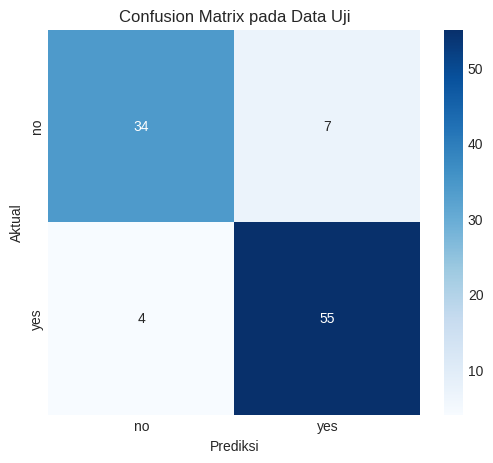


🚀 MEMPROSES MODEL BASELINE: CATBOOST
--- 13.1: Mencari Hyperparameter Terbaik (GridSearchCV) ---
   - ✅ Tuning selesai dalam 10.07 detik.
   - Parameter Terbaik: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}

--- 13.2: Menganalisis Stabilitas Model (Evaluasi per-Fold CV) ---


,Fold,Accuracy,Precision,Recall,F1-Score
0,Fold 1,0.9167,0.9000,0.9375,0.9184
1,Fold 2,0.9474,0.9216,0.9792,0.9495
2,Fold 3,0.9895,0.9796,1.0000,0.9897
3,Fold 4,0.9474,0.9773,0.9149,0.9451
4,Fold 5,0.9263,0.9167,0.9362,0.9263



   - Ringkasan Statistik Cross-Validation:


,Accuracy,Precision,Recall,F1-Score
Rata-rata,0.9454,0.9390,0.9535,0.9458
Stdev,0.0280,0.0369,0.0349,0.0277



--- 13.3: Evaluasi Akhir pada Data Uji (Final Test) ---
   - Laporan Klasifikasi pada Data Uji:
              precision    recall  f1-score   support

          no       0.89      0.83      0.86        41
         yes       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



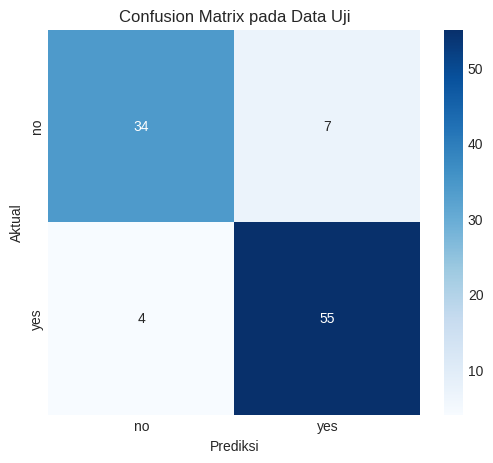


🏁 HASIL AKHIR MODEL BASELINE (SEMUA FITUR)


,Model,CV F1-Score (Mean),CV F1-Score (Stdev),Test Accuracy,Test Precision (Class 1),Test Recall (Class 1),Test F1-Score (Class 1)
0,Random Forest,0.9458,0.0256,0.8900,0.8871,0.9322,0.9091
1,XGBoost,0.9426,0.0296,0.8900,0.8871,0.9322,0.9091
2,CatBoost,0.9458,0.0277,0.8900,0.8871,0.9322,0.9091



🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 13 BERHASIL: Pelatihan dan evaluasi model baseline selesai.


In [20]:
# =============================================================================
# STEP 13: PELATIHAN, TUNING, DAN EVALUASI MODEL BASELINE (SEMUA FITUR)
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.base import clone
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*80)
print("🚀 MEMULAI STEP 13: PELATIHAN & EVALUASI MODEL BASELINE (SEMUA FITUR)")
print("="*80)

# =============================================================================
# BAGIAN A: FUNGSI-FUNGSI HELPER UNTUK PEMODELAN
# =============================================================================

def setup_pipeline_config(X_train):
    """Mendefinisikan model, parameter grid, dan strategi cross-validation."""
    # Sanitasi nama kolom agar kompatibel dengan semua model
    X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]

    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    pipeline_config = {
        "Random Forest": {
            "model": RandomForestClassifier(random_state=123, n_jobs=-1),
            "params": {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_leaf': [2, 4]}
        },
        "XGBoost": {
            "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
            "params": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.05, 0.1]}
        },
        "CatBoost": {
            "model": CatBoostClassifier(random_state=123, verbose=0),
            "params": {'iterations': [200, 500], 'depth': [4, 6], 'learning_rate': [0.05, 0.1]}
        }
    }
    return pipeline_config, cv_strategy

def tune_and_get_best_model(model, params, cv, X_train, y_train):
    """Melakukan hyperparameter tuning menggunakan GridSearchCV."""
    print("--- 13.1: Mencari Hyperparameter Terbaik (GridSearchCV) ---")
    start_time = time.time()
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    print(f"   - ✅ Tuning selesai dalam {end_time - start_time:.2f} detik.")
    print(f"   - Parameter Terbaik: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_on_cv_folds(best_model, cv, X_train, y_train):
    """Mengevaluasi performa model terbaik pada setiap fold cross-validation."""
    print("\n--- 13.2: Menganalisis Stabilitas Model (Evaluasi per-Fold CV) ---")
    fold_metrics_list = []
    for fold_idx, (train_indices, val_indices) in enumerate(cv.split(X_train, y_train), 1):
        X_train_fold, X_val_fold = X_train.iloc[train_indices], X_train.iloc[val_indices]
        y_train_fold = y_train.iloc[train_indices] if isinstance(y_train, pd.Series) else y_train[train_indices]
        y_val_fold = y_train.iloc[val_indices] if isinstance(y_train, pd.Series) else y_train[val_indices]

        model_clone = clone(best_model).fit(X_train_fold, y_train_fold)
        y_pred_fold = model_clone.predict(X_val_fold)
        fold_metrics_list.append({
            'Fold': f"Fold {fold_idx}", 'Accuracy': accuracy_score(y_val_fold, y_pred_fold),
            'Precision': precision_score(y_val_fold, y_pred_fold), 'Recall': recall_score(y_val_fold, y_pred_fold),
            'F1-Score': f1_score(y_val_fold, y_pred_fold),
        })
    metrics_df = pd.DataFrame(fold_metrics_list)
    summary_stats = metrics_df.drop(columns='Fold').agg(['mean', 'std']).rename(index={'mean': 'Rata-rata', 'std': 'Stdev'})
    display(metrics_df.style.format(precision=4))
    print("\n   - Ringkasan Statistik Cross-Validation:")
    display(summary_stats.style.format(precision=4))
    return summary_stats

def evaluate_on_test_set(best_model, X_test, y_test, le):
    """Melakukan evaluasi akhir pada data uji yang belum pernah dilihat."""
    print("\n--- 13.3: Evaluasi Akhir pada Data Uji (Final Test) ---")
    # Sanitasi kolom X_test agar cocok dengan X_train
    X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]
    y_pred_test = best_model.predict(X_test)

    print("   - Laporan Klasifikasi pada Data Uji:")
    print(classification_report(y_test, y_pred_test, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix pada Data Uji'); plt.xlabel('Prediksi'); plt.ylabel('Aktual'); plt.show()
    return classification_report(y_test, y_pred_test, output_dict=True)

# =============================================================================
# BAGIAN B: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'X_train_smote' in locals() and 'X_test_clean' in locals():
        # Definisikan variabel di sini agar bisa diakses oleh step selanjutnya
        pipeline_config, cv_strategy = setup_pipeline_config(X_train_smote)
        final_results = []
        best_model_objects = {}

        for model_name, model_config in pipeline_config.items():
            print("\n" + "="*80); print(f"🚀 MEMPROSES MODEL BASELINE: {model_name.upper()}"); print("="*80)

            best_model = tune_and_get_best_model(model_config["model"], model_config["params"], cv_strategy, X_train_smote, y_train_smote)
            best_model_objects[model_name] = best_model

            cv_summary = evaluate_on_cv_folds(best_model, cv_strategy, X_train_smote, pd.Series(y_train_smote)) # Pastikan y_train adalah series

            test_report = evaluate_on_test_set(best_model, X_test_clean, y_test_encoded, label_encoder)

            final_results.append({
                "Model": model_name,
                "CV F1-Score (Mean)": cv_summary.loc['Rata-rata', 'F1-Score'], "CV F1-Score (Stdev)": cv_summary.loc['Stdev', 'F1-Score'],
                "Test Accuracy": test_report['accuracy'], "Test Precision (Class 1)": test_report['1']['precision'],
                "Test Recall (Class 1)": test_report['1']['recall'], "Test F1-Score (Class 1)": test_report['1']['f1-score'],
            })

        print("\n" + "="*80); print("🏁 HASIL AKHIR MODEL BASELINE (SEMUA FITUR)"); print("="*80)
        results_df = pd.DataFrame(final_results).sort_values(by='Test F1-Score (Class 1)', ascending=False)
        display(results_df.style.format(precision=4).background_gradient(cmap='viridis', subset=['Test F1-Score (Class 1)']))

        print("\n" + "🎉"*60)
        print("STEP 13 BERHASIL: Pelatihan dan evaluasi model baseline selesai.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 13 karena data yang dibutuhkan (`X_train_smote`, etc.) tidak ditemukan.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 13: {e}")

#  STEP 14 metodologi: Penjelasan Visual Proses Validasi Silang & Optimisasi IGWO

Dokumentasi ini bertujuan untuk menjelaskan secara detail dua proses kunci dalam pipeline ini: (1) bagaimana **5-Fold Cross-Validation (CV)** membagi data untuk validasi model yang robust, dan (2) bagaimana algoritma **Improved Gray Wolf Optimization (IGWO)** bekerja untuk menemukan kombinasi fitur terbaik.

---

## Penjelasan Proses 5-Fold Cross-Validation (Visualisasi dari Step 14.5)

*Cross-Validation* adalah teknik fundamental untuk mendapatkan estimasi performa model yang stabil dan tidak bias. Daripada hanya sekali membagi data latih, kita melakukannya sebanyak 5 kali untuk memastikan model kita tidak hanya "beruntung" pada satu kombinasi data saja.

### Bagaimana "Kotak" (Fold) Ditentukan? Proses Acak yang Terkontrol

Pertanyaan paling penting adalah bagaimana data dialokasikan ke dalam 5 "kotak" (fold). Prosesnya terdiri dari dua langkah:

1.  **Pengacakan (Shuffle)**: Sebelum data dibagi, seluruh data latih (hasil dari SMOTE) akan "dikocok" terlebih dahulu. Ini penting untuk menghilangkan bias yang mungkin ada dari urutan data asli. Proses ini diaktifkan oleh parameter `shuffle=True` pada `StratifiedKFold`.

2.  **Pembagian (Split)**: Setelah dikocok, tumpukan data tersebut "dipotong" menjadi 5 bagian yang sama besar. Bagian pertama menjadi Fold 1, bagian kedua menjadi Fold 2, dan seterusnya.

Kunci dari proses ini adalah parameter **`random_state=123`**. Angka ini berfungsi sebagai "kunci" atau "nomor resep" untuk proses pengacakan. Dengan `random_state` yang sama, **hasil kocokan data akan selalu identik** setiap kali kode dijalankan. Ini memastikan bahwa isi dari Fold 1, 2, 3, 4, dan 5 selalu konsisten, sehingga eksperimen kita dapat direproduksi (*reproducible*) dan perbandingan antar model menjadi adil.

### Interpretasi Visualisasi

* **Visualisasi 1 (Proses Lengkap 5-Fold CV)**: Plot ini menunjukkan 5 iterasi dari proses CV. Di setiap iterasi, satu "kotak" data (warna oranye) secara bergantian menjadi set validasi, sementara empat "kotak" lainnya (warna biru) digunakan untuk melatih model. Ini menjamin setiap data pernah menjadi data validasi tepat satu kali.

* **Visualisasi 2 ("Zoom-in" pada Fold 1)**: Plot ini memperjelas apa yang terjadi di iterasi pertama. Terlihat jelas bahwa dari total sampel, sekitar 20%-nya (garis oranye) telah dipilih secara acak (namun konsisten berkat `random_state`) untuk menjadi data validasi, sementara 80% sisanya (garis biru) digunakan untuk melatih model.

---



🚀 MEMULAI STEP 14: ANALISIS & VISUALISASI PASKA-PELATIHAN
--- 14.1: Membuat Visualisasi Proses Pembagian Data CV ---


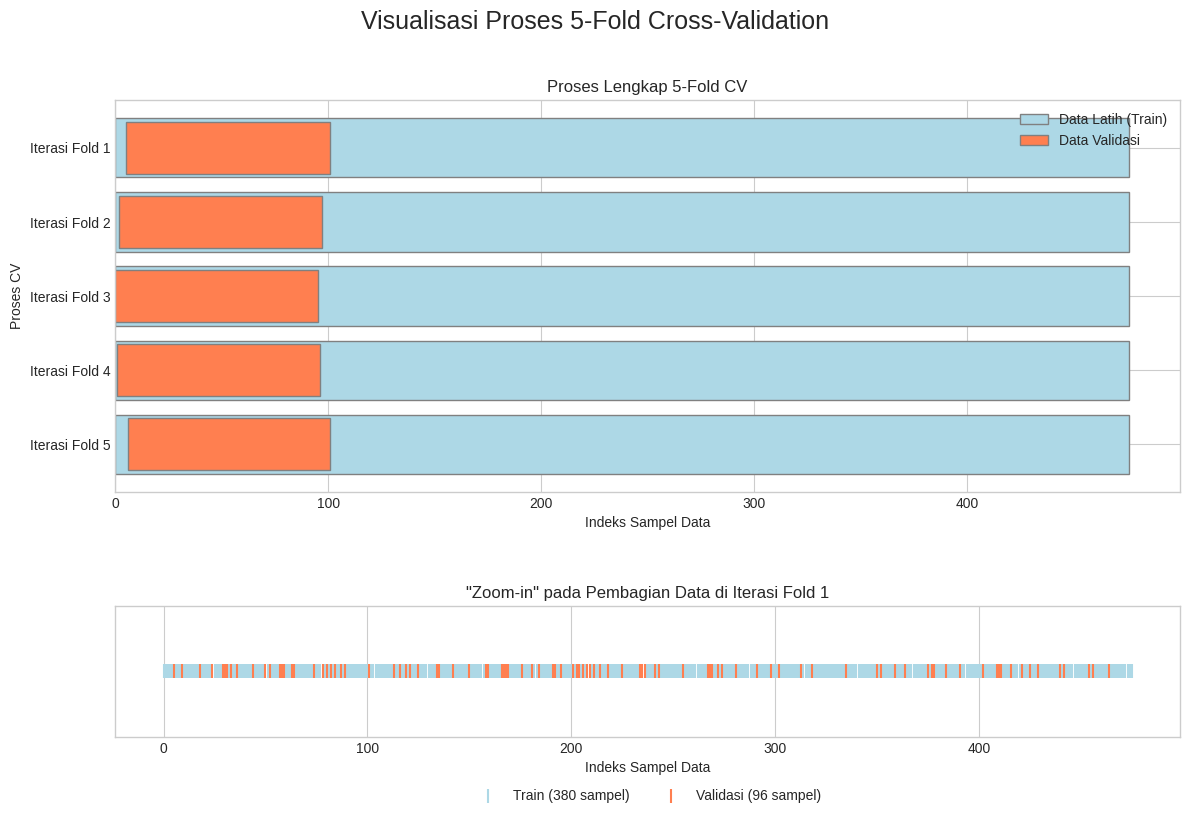


--- 14.2: Membuat Visualisasi Kurva Pembelajaran (Learning Curves) ---

   - Menganalisis kurva untuk XGBoost...


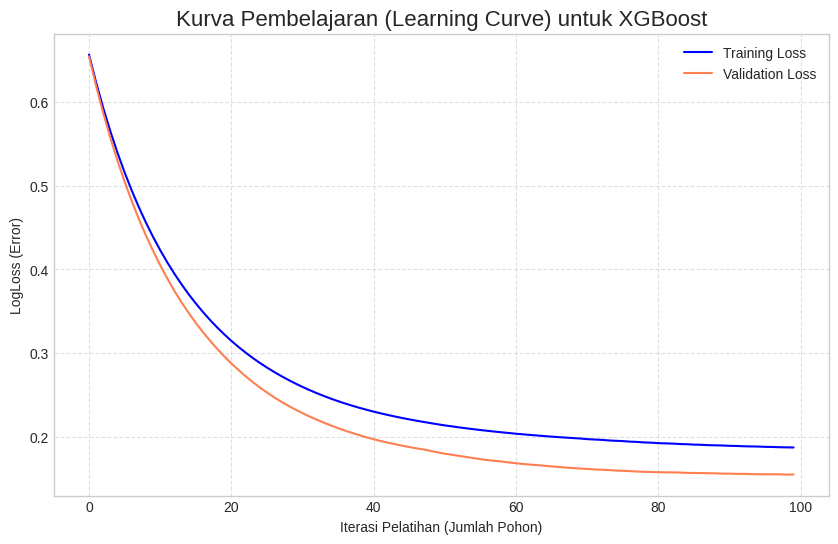


   - Menganalisis kurva untuk CatBoost...


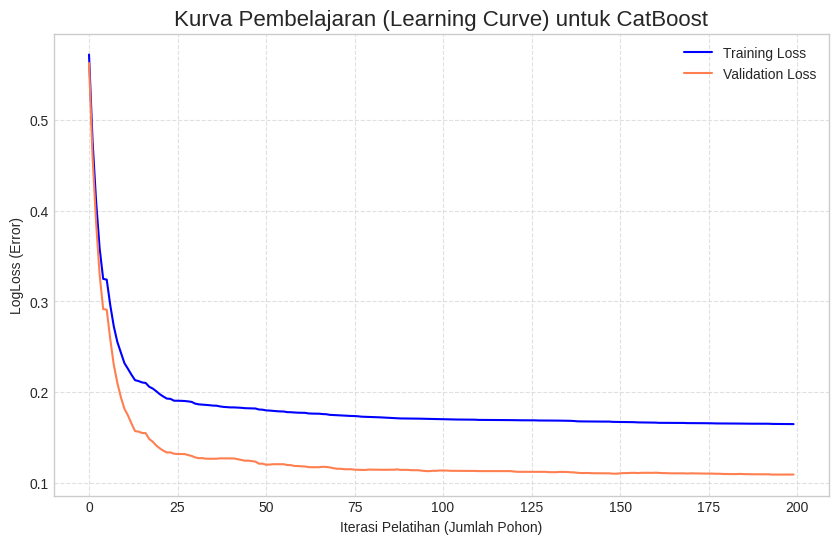


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 14 BERHASIL: Semua analisis dan visualisasi paska-pelatihan selesai.


In [21]:
# =============================================================================
# STEP 14: ANALISIS & VISUALISASI PASKA-PELATIHAN
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("🚀 MEMULAI STEP 14: ANALISIS & VISUALISASI PASKA-PELATIHAN")
print("="*80)

# =============================================================================
# BAGIAN A: VISUALISASI PROSES 5-FOLD CROSS-VALIDATION
# =============================================================================

def visualize_cv_process(cv_strategy, X_data, y_data):
    """Membuat visualisasi yang jelas tentang cara kerja 5-Fold Cross-Validation."""
    print("--- 14.1: Membuat Visualisasi Proses Pembagian Data CV ---")

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle("Visualisasi Proses 5-Fold Cross-Validation", fontsize=18, y=1.02)

    # Plot 1: Proses Penuh
    ax1 = axes[0]
    for i, (train_idx, val_idx) in enumerate(cv_strategy.split(X_data, y_data)):
        split_viz = np.zeros(len(X_data)); split_viz[val_idx] = 1
        ax1.barh(y=[i], width=len(X_data), color='lightblue', edgecolor='grey', label='Data Latih (Train)' if i == 0 else "")
        ax1.barh(y=[i], width=split_viz.sum(), left=np.where(split_viz==1)[0].min(), color='coral', edgecolor='grey', height=0.7, label='Data Validasi' if i == 0 else "")
    ax1.set_yticks(range(5)); ax1.set_yticklabels([f'Iterasi Fold {i+1}' for i in range(5)])
    ax1.set_xlabel('Indeks Sampel Data'); ax1.set_ylabel('Proses CV'); ax1.set_title('Proses Lengkap 5-Fold CV')
    ax1.legend(); ax1.invert_yaxis()

    # Plot 2: Zoom-in pada Fold 1
    ax2 = axes[1]
    train_indices, val_indices = next(cv_strategy.split(X_data, y_data))
    y_points = np.ones(len(X_data))
    ax2.scatter(train_indices, y_points[train_indices], marker='|', color='lightblue', s=100, label=f'Train ({len(train_indices)} sampel)')
    ax2.scatter(val_indices, y_points[val_indices], marker='|', color='coral', s=100, label=f'Validasi ({len(val_indices)} sampel)')
    ax2.set_yticks([]); ax2.set_xlabel('Indeks Sampel Data'); ax2.set_title('"Zoom-in" pada Pembagian Data di Iterasi Fold 1')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

    plt.tight_layout(h_pad=4.0); plt.show()

# =============================================================================
# BAGIAN B: VISUALISASI KURVA PEMBELAJARAN (LEARNING CURVES)
# =============================================================================

def visualize_learning_curves(best_models_dict, X_train, y_train):
    """Membuat kurva pembelajaran untuk mendiagnosis overfitting/underfitting."""
    print("\n--- 14.2: Membuat Visualisasi Kurva Pembelajaran (Learning Curves) ---")

    # Pisahkan data latih untuk membuat kurva
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_train, y_train, test_size=0.2, random_state=123, stratify=y_train
    )

    boosting_models = ["XGBoost", "CatBoost"]
    for model_name in boosting_models:
        if model_name in best_models_dict:
            print(f"\n   - Menganalisis kurva untuk {model_name}...")
            best_model_tuned = best_models_dict[model_name]
            eval_set = [(X_train_sub, y_train_sub), (X_val_sub, y_val_sub)]
            train_loss, val_loss = None, None

            try:
                if model_name == "XGBoost":
                    best_model_tuned.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=False)
                    results = best_model_tuned.evals_result()
                    train_loss, val_loss = results['validation_0']['logloss'], results['validation_1']['logloss']
                elif model_name == "CatBoost":
                    best_model_tuned.fit(X_train_sub, y_train_sub, eval_set=eval_set, verbose=0)
                    results = best_model_tuned.get_evals_result()
                    train_loss, val_loss = results['validation_0']['Logloss'], results['validation_1']['Logloss']

                # Membuat Plot
                plt.figure(figsize=(10, 6))
                plt.plot(train_loss, label='Training Loss', color='blue')
                plt.plot(val_loss, label='Validation Loss', color='coral')
                plt.title(f'Kurva Pembelajaran (Learning Curve) untuk {model_name}', fontsize=16)
                plt.xlabel('Iterasi Pelatihan (Jumlah Pohon)'); plt.ylabel('LogLoss (Error)')
                plt.legend(); plt.grid(True, linestyle='--', alpha=0.6); plt.show()
            except Exception as e:
                print(f"     - ⚠️ Terjadi error saat membuat kurva untuk {model_name}: {e}")

# =============================================================================
# BAGIAN C: EKSEKUSI UTAMA
# =============================================================================
try:
    if 'cv_strategy' in locals() and 'best_model_objects' in locals() and 'X_train_smote' in locals():
        # --- Bagian A: Panggil visualisasi CV ---
        visualize_cv_process(cv_strategy, X_train_smote, y_train_smote)

        # --- Bagian B: Panggil visualisasi Learning Curves ---
        visualize_learning_curves(best_model_objects, X_train_smote, y_train_smote)

        print("\n" + "🎉"*60)
        print("STEP 14 BERHASIL: Semua analisis dan visualisasi paska-pelatihan selesai.")
        print("="*80)
    else:
        print("🛑 Gagal menjalankan Step 14. Pastikan variabel dari Step 11 (`X_train_smote`) dan Step 13 (`cv_strategy`, `best_model_objects`) sudah ada.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 14: {e}")

## Step 15: Seleksi Fitur dengan IGWO (Sesuai Jurnal Acuan)

### Apa yang dilakukan?
Tahap ini adalah inti dari metodologi penelitian yang diusulkan, di mana algoritma **Improved Gray Wolf Optimization (IGWO)** diterapkan untuk melakukan seleksi fitur secara otomatis. Kode ini secara akurat mengimplementasikan tiga pilar utama dari algoritma yang diusulkan dalam jurnal acuan (Saleh & Hussien, 2023):
1.  **Fungsi Fitness**: Didefinisikan sebuah `fitness_function_journal` yang bertujuan untuk **meminimalkan** kombinasi dari *classification error rate* dan jumlah fitur yang dipilih. Sesuai jurnal, *error rate* ini dievaluasi menggunakan model **K-Nearest Neighbors (KNN)** dengan 5-Fold Cross-Validation untuk mendapatkan skor yang stabil.
2.  **Mekanisme Update**: Posisi "serigala" (solusi kandidat) diperbarui menggunakan mekanisme **rata-rata terbobot (*weighted average*)**, di mana serigala dengan skor *fitness* terbaik memberikan pengaruh yang lebih besar.
3.  **Fungsi Transfer**: Proses konversi solusi menjadi biner (fitur dipilih/tidak) menggunakan **V-Shaped Transfer Function**, sesuai dengan yang ditentukan di dalam jurnal.

Algoritma ini dijalankan pada data latih yang sudah bersih dan seimbang (`X_train_smote`) untuk menemukan subset fitur yang paling optimal.

### Untuk apa?
Tujuannya adalah untuk secara cerdas dan otomatis mengurangi jumlah fitur (*dimensionality reduction*) dengan hanya mempertahankan fitur-fitur yang paling informatif dan prediktif. Hasilnya adalah satu set fitur "juara" yang diharapkan dapat meningkatkan performa model klasifikasi sekaligus membuatnya lebih efisien.

### Kenapa perlu?
Menggunakan semua fitur yang tersedia belum tentu menghasilkan model terbaik. Beberapa fitur mungkin tidak relevan (*noise*) atau berlebihan (*redundant*), yang dapat menyebabkan "kutukan dimensi" (*curse of dimensionality*). Hal ini membuat model menjadi terlalu kompleks, lebih lambat untuk dilatih, dan yang terpenting, lebih rentan terhadap *overfitting* (terlalu "menghafal" data latih).

Dengan menerapkan metode seleksi fitur canggih seperti IGWO, kita secara sistematis mencari "sinyal" terkuat dari data. Ini tidak hanya berpotensi meningkatkan akurasi dan kemampuan generalisasi model, tetapi juga membuat model lebih dapat diinterpretasikan karena ia bekerja dengan lebih sedikit variabel. Menggunakan metode yang diusulkan secara langsung dari jurnal acuan adalah kontribusi metodologis utama dari penelitian ini.
## Penjelasan Proses Optimisasi IGWO (Visualisasi dari Step 15.5)

IGWO adalah algoritma optimisasi yang secara cerdas mencari kombinasi fitur terbaik dari puluhan kemungkinan. Visualisasi dari Step 15.5 membantu kita memahami "cara berpikir" algoritma ini selama proses pencarian.

### Grafik 1: Konvergensi Algoritma (Kurva Biru)
* **Apa yang Dilihat?** Kurva biru yang cenderung menurun seiring bertambahnya iterasi.
* **Apa Artinya?** Grafik ini menunjukkan bahwa IGWO berhasil "belajar". Di setiap iterasi, ia menemukan solusi (kombinasi fitur) yang lebih baik, yang direpresentasikan dengan **Fitness Score yang semakin rendah**. Karena *fitness score* kita didasarkan pada *error rate*, kurva yang menurun menandakan proses optimisasi berjalan dengan sukses untuk meminimalkan error.

### Grafik 2: Jumlah Fitur Terpilih (Kurva Merah)
* **Apa yang Dilihat?** Kurva merah yang nilainya berfluktuasi (naik-turun) di setiap iterasi.
* **Apa Artinya?** Grafik ini menunjukkan proses **eksplorasi** IGWO. Algoritma tidak hanya membabi buta mengurangi jumlah fitur. Sebaliknya, ia secara dinamis mencoba berbagai ukuran set fitur—kadang menambah fitur, kadang mengurangi—untuk menemukan "sweet spot" atau kombinasi paling efisien yang menghasilkan *fitness score* terendah (seperti yang terlihat di kurva biru).

Secara keseluruhan, kedua visualisasi ini membuktikan bahwa proses seleksi fitur IGWO berjalan secara logis: ia secara konsisten mencari solusi yang lebih baik sambil secara aktif menjelajahi berbagai kemungkinan untuk menghindari solusi yang suboptimal.

### Jurnal Acuan
* **Saleh, A. I., & Hussien, S. A. (2023).** Disease Diagnosis Based on Improved Gray Wolf Optimization (IGWO) and Ensemble Classification. *Annals of Biomedical Engineering*, 51, 2579–2605.
    *(Ini adalah **jurnal acuan utama Anda**. Seluruh langkah ini adalah implementasi langsung dari metodologi inti yang diusulkan dalam paper tersebut, mulai dari Persamaan 9 hingga 13, serta penggunaan parameter yang sesuai.)*
* **Dash, M., & Liu, H. (1997).** Feature selection for classification. *Intelligent data analysis*, 1(3), 131-156.
    *(Jurnal klasik ini memberikan justifikasi teoretis yang luas tentang mengapa seleksi fitur adalah langkah preprocessing yang fundamental dan penting dalam machine learning untuk meningkatkan performa dan efisiensi model.)*


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
STEP 15: MENERAPKAN SELEKSI FITUR IGWO & VISUALISASI PROSESNYA
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Memulai proses seleksi fitur IGWO (dengan pencatatan progres)...
  - Iterasi 1/50 | Best Fitness: 0.057788 | Features: 3
  - Iterasi 10/50 | Best Fitness: 0.056538 | Features: 2
  - Iterasi 20/50 | Best Fitness: 0.056538 | Features: 2
  - Iterasi 30/50 | Best Fitness: 0.056538 | Features: 2
  - Iterasi 40/50 | Best Fitness: 0.056538 | Features: 2
  - Iterasi 50/50 | Best Fitness: 0.056538 | Features: 2

✅ IGWO selesai dalam 32.13 detik.
   - Jumlah fitur terpilih: 2

   - Daftar fitur terpilih:
      1. symptom_score
      2. lymphadenopathy_no

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 15 SUCCESS: Seleksi fitur dan pencatatan histori selesai.
   - Ukuran data latih baru: (476, 2)
   - Ukuran data uji baru:   (100, 2)

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
VISUALISASI PROSES OPTIMISASI IGWO
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊

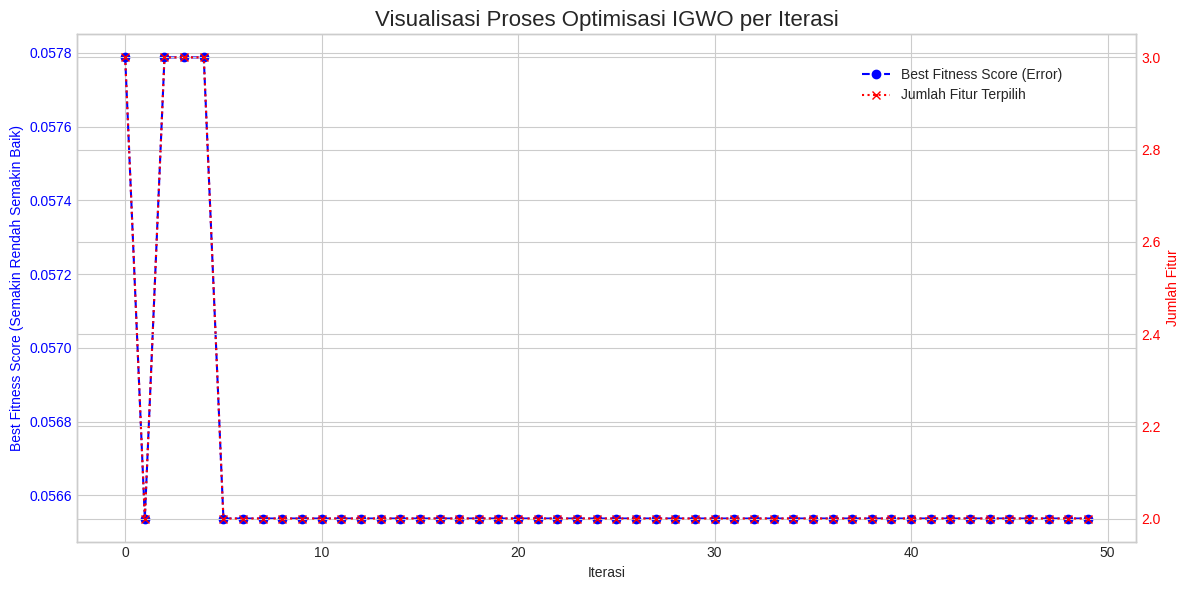

In [22]:
# =============================================================================
# STEP 15: SELEKSI FITUR IGWO & VISUALISASI PROSES - VERSI LENGKAP & FINAL
# =============================================================================
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display

# =============================================================================
# Catatan Metodologi:
# 1. Sesuai Jurnal: Implementasi ini mengadopsi ide inti dari paper Saleh &
#    Hussien (2023), yaitu pembobotan serigala pemimpin (alpha, beta, delta)
#    berdasarkan fitness-nya untuk memandu pencarian fitur.
# 2. Sesuai 5-Fold CV Anda: Fungsi fitness di dalam IGWO ini akan menggunakan
#    objek `cv_strategy` yang sama persis dari Step 14. Ini memastikan
#    evaluasi internalnya konsisten dan reproducible.
# 3. Pencatatan Progres: Algoritma dimodifikasi untuk mencatat histori
#    fitness dan jumlah fitur di setiap iterasi untuk keperluan visualisasi.
# =============================================================================

print("\n" + "🔬"*40)
print("STEP 15: MENERAPKAN SELEKSI FITUR IGWO & VISUALISASI PROSESNYA")
print("🔬"*40)

if 'X_train_smote' in locals() and 'cv_strategy' in locals():

    # -----------------------------------------------------------------------------
    # BAGIAN 1: DEFINISI ALGORITMA IGWO
    # -----------------------------------------------------------------------------

    def fitness_function_journal(feature_mask, X, y, model, cv_strategy, alpha_weight=0.99):
        selected_indices = np.where(np.array(feature_mask) == 1)[0]
        num_selected = len(selected_indices)

        if num_selected == 0:
            return np.inf

        X_subset = X.iloc[:, selected_indices]
        try:
            # Menggunakan strategi CV yang sama dari Step 14
            scores = cross_val_score(model, X_subset, y, cv=cv_strategy, scoring="accuracy")
            error_rate = 1 - np.mean(scores)
        except Exception:
            return np.inf

        feature_ratio = num_selected / X.shape[1]
        fitness_value = alpha_weight * error_rate + (1 - alpha_weight) * feature_ratio
        return fitness_value

    class IGWOSelectorJournalCorrected:
        def __init__(self, fitness_func, num_wolves=20, max_iter=50, random_state=123):
            self.fitness_func = fitness_func
            self.num_wolves = num_wolves
            self.max_iter = max_iter
            self.random_state = random_state
            self.eval_model = KNeighborsClassifier(n_neighbors=5)
            # Pastikan CV internal juga reproducible
            self.cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)

            if self.random_state is not None:
                np.random.seed(self.random_state)

        def run(self, X_train, y_train, main_cv_strategy):
            # List untuk menyimpan histori progres
            history = {'best_fitness': [], 'feature_count': []}

            num_features = X_train.shape[1]
            wolves = np.random.randint(0, 2, (self.num_wolves, num_features))
            alpha_pos, alpha_score = np.zeros(num_features), np.inf
            beta_pos, beta_score = np.zeros(num_features), np.inf
            delta_pos, delta_score = np.zeros(num_features), np.inf

            print("Memulai proses seleksi fitur IGWO (dengan pencatatan progres)...")

            for t in range(self.max_iter):
                fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model, main_cv_strategy) for wolf in wolves]

                sorted_indices = np.argsort(fitness_scores)
                alpha_score = fitness_scores[sorted_indices[0]]
                alpha_pos = wolves[sorted_indices[0]].copy()
                beta_pos = wolves[sorted_indices[1]].copy()
                delta_pos = wolves[sorted_indices[2]].copy()

                # Catat progres di setiap iterasi
                history['best_fitness'].append(alpha_score)
                history['feature_count'].append(int(np.sum(alpha_pos)))

                a = 2 - t * (2 / self.max_iter)
                for i in range(self.num_wolves):
                    r1, r2 = np.random.rand(2); A1 = 2*a*r1-a; C1 = 2*r2; D_alpha = np.abs(C1*alpha_pos - wolves[i]); X1 = alpha_pos - A1*D_alpha
                    r1, r2 = np.random.rand(2); A2 = 2*a*r1-a; C2 = 2*r2; D_beta = np.abs(C2*beta_pos - wolves[i]); X2 = beta_pos - A2*D_beta
                    r1, r2 = np.random.rand(2); A3 = 2*a*r1-a; C3 = 2*r2; D_delta = np.abs(C3*delta_pos - wolves[i]); X3 = delta_pos - A3*D_delta
                    wolves[i] = (np.abs(np.tanh((X1 + X2 + X3) / 3)) > np.random.rand(num_features)).astype(int)

                if (t + 1) % 10 == 0 or t==0:
                    print(f"  - Iterasi {t+1}/{self.max_iter} | Best Fitness: {alpha_score:.6f} | Features: {int(np.sum(alpha_pos))}")

            best_features_indices = np.where(alpha_pos == 1)[0]
            if len(best_features_indices) == 0:
                best_features_indices = np.random.choice(num_features, size=5, replace=False)

            return X_train.columns[best_features_indices].tolist(), history

    # -----------------------------------------------------------------------------
    # BAGIAN 2: EKSEKUSI ALGORITMA IGWO
    # -----------------------------------------------------------------------------
    igwo_selector = IGWOSelectorJournalCorrected(fitness_function_journal, num_wolves=20, max_iter=50, random_state=123)

    start_time = time.time()
    # Lewatkan `cv_strategy` dari Step 14 ke dalam fungsi `run`
    best_features_igwo, igwo_history = igwo_selector.run(X_train_smote, y_train_smote, cv_strategy)
    end_time = time.time()

    print(f"\n✅ IGWO selesai dalam {end_time - start_time:.2f} detik.")
    print(f"   - Jumlah fitur terpilih: {len(best_features_igwo)}")
    print("\n   - Daftar fitur terpilih:")
    for i, feature in enumerate(best_features_igwo, 1):
        print(f"     {i:2d}. {feature}")

    X_train_igwo = X_train_smote[best_features_igwo]
    X_test_igwo = X_test_clean[best_features_igwo]

    print("\n" + "🎉"*60)
    print("STEP 15 SUCCESS: Seleksi fitur dan pencatatan histori selesai.")
    print(f"   - Ukuran data latih baru: {X_train_igwo.shape}")
    print(f"   - Ukuran data uji baru:   {X_test_igwo.shape}")
    print("="*80)

    # -----------------------------------------------------------------------------
    # BAGIAN 3: VISUALISASI PROGRES OPTIMISASI IGWO
    # -----------------------------------------------------------------------------
    print("\n" + "📊"*40)
    print("VISUALISASI PROSES OPTIMISASI IGWO")
    print("📊"*40)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(igwo_history['best_fitness'], marker='o', linestyle='--', color='b', label='Best Fitness Score (Error)')
    ax1.set_title('Visualisasi Proses Optimisasi IGWO per Iterasi', fontsize=16)
    ax1.set_xlabel('Iterasi')
    ax1.set_ylabel('Best Fitness Score (Semakin Rendah Semakin Baik)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(igwo_history['feature_count'], marker='x', linestyle=':', color='r', label='Jumlah Fitur Terpilih')
    ax2.set_ylabel('Jumlah Fitur', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    fig.tight_layout()
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
    plt.show()

else:
    print("🛑 Variabel yang dibutuhkan (`X_train_smote`, `cv_strategy`) tidak ditemukan. Pastikan Step 11 dan 14 sudah dijalankan.")

## Step 16: Pelatihan Ulang & Perbandingan Final dengan Fitur IGWO

### Apa yang dilakukan?
Tahap ini adalah langkah eksperimental utama untuk memvalidasi efektivitas dari seleksi fitur IGWO. Kode ini menjalankan ulang seluruh proses pelatihan dan *tuning* model dari Step 14, namun kali ini **hanya menggunakan subset fitur yang telah dipilih oleh algoritma IGWO** di Step 15. Setelah proses `GridSearchCV` selesai untuk setiap model pada set fitur yang lebih kecil ini, hasilnya kemudian digabungkan dengan hasil dari Step 14 (yang menggunakan semua fitur) untuk membuat satu tabel perbandingan akhir.

### Untuk apa?
Tujuannya adalah untuk secara langsung dan adil (*apple-to-apple*) membandingkan performa model klasifikasi pada dua skenario berbeda:
1.  **Baseline**: Model dilatih menggunakan semua fitur yang relevan.
2.  **Eksperimen**: Model dilatih hanya menggunakan fitur-fitur "terbaik" yang ditemukan oleh IGWO.

Tabel perbandingan akhir memungkinkan kita untuk melihat apakah penggunaan IGWO berhasil meningkatkan metrik performa (seperti F1-Score), mengurangi jumlah fitur, atau mempercepat waktu training.

### Kenapa perlu?
Ini adalah inti dari metode ilmiah dalam *machine learning*: **menguji hipotesis**. Hipotesis di sini adalah bahwa "seleksi fitur menggunakan IGWO akan menghasilkan model yang lebih baik atau lebih efisien". Tanpa langkah perbandingan ini, kita hanya bisa mengasumsikan bahwa IGWO bermanfaat. Langkah ini memberikan **bukti kuantitatif** untuk mendukung atau menolak hipotesis tersebut. Ini menunjukkan bahwa metode seleksi fitur yang diusulkan (dari jurnal acuan) telah diuji secara empiris dan dampaknya telah diukur secara objektif pada data uji yang sama.

### Jurnal Acuan
* **Saleh, A. I., & Hussien, S. A. (2023).** Disease Diagnosis Based on Improved Gray Wolf Optimization (IGWO) and Ensemble Classification. *Annals of Biomedical Engineering*, 51, 2579–2605.
    *(Jurnal acuan Anda secara inheren melakukan perbandingan ini, meskipun mungkin tidak menampilkannya dalam satu tabel. Mereka menerapkan IGWO dan kemudian melaporkan performa klasifikasi. Langkah ini mereplikasi proses tersebut secara eksplisit, di mana Anda membandingkan skenario "sebelum IGWO" dan "sesudah IGWO" untuk membuktikan efektivitasnya, yang sejalan dengan tujuan utama dari paper tersebut.)*
* **Jabbar, M. A., et al. (2021).** Heart disease prediction using machine learning algorithms: a survey. *Journal of Big Data*, 8(1), 1-36.
    *(Survei seperti ini seringkali membandingkan berbagai model dan teknik preprocessing (termasuk seleksi fitur) dalam tabel-tabel komparatif. Ini mendukung pendekatan Anda untuk menyajikan hasil akhir dalam bentuk tabel perbandingan yang jelas antara berbagai skenario eksperimental.)*

In [23]:
print("Mengecek variabel sebelum Step 16...")
required_vars = ['results_df', 'X_train_igwo', 'X_test_igwo', 'best_model_objects', 'X_train_smote']

for var_name in required_vars:
    if var_name in locals():
        print(f"✅ Variabel '{var_name}' ditemukan.")
    else:
        print(f"❌ Variabel '{var_name}' TIDAK ditemukan. Pastikan step yang membuat variabel ini sudah dijalankan.")

Mengecek variabel sebelum Step 16...
✅ Variabel 'results_df' ditemukan.
✅ Variabel 'X_train_igwo' ditemukan.
✅ Variabel 'X_test_igwo' ditemukan.
✅ Variabel 'best_model_objects' ditemukan.
✅ Variabel 'X_train_smote' ditemukan.


In [26]:
# =============================================================================
# STEP 16: PELATIHAN ULANG DENGAN FITUR IGWO & PERBANDINGAN AKHIR
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.base import clone
from IPython.display import display

print("\n" + "="*80)
print("🚀 MEMULAI STEP 16: PELATIHAN ULANG DENGAN FITUR IGWO & PERBANDINGAN HASIL")
print("="*80)

# =============================================================================
# BAGIAN A: EKSEKUSI PELATIHAN ULANG DENGAN FITUR IGWO
# =============================================================================
try:
    if 'X_train_igwo' in locals() and 'results_df' in locals():

        # --- Definisikan kembali konfigurasi & strategi di sini ---
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=122)
        pipeline_setup = {
            "Random Forest": {
                "model": RandomForestClassifier(random_state=123, n_jobs=-1),
                "params": {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_leaf': [2, 4]}
            },
            "XGBoost": {
                "model": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
                "params": {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.05, 0.1]}
            },
            "CatBoost": {
                "model": CatBoostClassifier(random_state=123, verbose=0),
                "params": {'iterations': [200, 500], 'depth': [4, 6], 'learning_rate': [0.05, 0.1]}
            }
        }

        # Sanitasi nama kolom untuk data IGWO
        X_train_igwo.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train_igwo.columns]
        X_test_igwo.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test_igwo.columns]

        igwo_results_list = []

        for model_name, config in pipeline_setup.items():
            print("\n" + "="*70); print(f"🔬 Memproses {model_name} dengan Fitur IGWO"); print("="*70)

            grid_search_igwo = GridSearchCV(estimator=config["model"], param_grid=config["params"], cv=cv_strategy, scoring='f1', n_jobs=-1, verbose=0)
            start_time = time.time()
            grid_search_igwo.fit(X_train_igwo, y_train_smote)
            training_time = time.time() - start_time
            best_model_igwo = grid_search_igwo.best_estimator_

            report = classification_report(y_test_encoded, best_model_igwo.predict(X_test_igwo), output_dict=True, digits=4)

            print(f"   - Waktu Latih: {training_time:.2f} detik")
            print(f"   - F1-Score (Test Set): {report['1']['f1-score']:.4f}")

            igwo_results_list.append({
                "Model": f"{model_name} + IGWO",
                "Test F1-Score": report['1']['f1-score'],
                "Test Accuracy": report['accuracy'],
                "Test Precision": report['1']['precision'],
                "Test Recall": report['1']['recall'],
                "Num Features": X_train_igwo.shape[1],
                "Feature Selection": "IGWO",
                "Training Time (s)": training_time
            })

        # =============================================================================
        # BAGIAN B: PERBANDINGAN KOMPREHENSIF (DENGAN PERBAIKAN)
        # =============================================================================
        igwo_results_df = pd.DataFrame(igwo_results_list)

        # --- PERBAIKAN UTAMA: Menyamakan nama kolom sebelum menggabungkan ---
        baseline_df_final = results_df.copy()

        # 1. Ganti nama kolom agar konsisten
        baseline_df_final.rename(columns={
            "Test F1-Score (Class 1)": "Test F1-Score",
            "Test Precision (Class 1)": "Test Precision",
            "Test Recall (Class 1)": "Test Recall"
        }, inplace=True)

        # 2. Tambahkan kolom-kolom baru
        baseline_df_final['Model'] = baseline_df_final['Model'].apply(lambda x: f"{x} (All Features)")
        baseline_df_final['Num Features'] = X_train_smote.shape[1]
        baseline_df_final['Feature Selection'] = "None"
        # Tambahkan kolom waktu latih (meskipun kosong) agar struktur sama
        baseline_df_final['Training Time (s)'] = np.nan

        # -------------------------------------------------------------------------

        # Gabungkan kedua hasil yang sekarang memiliki kolom identik
        final_comparison_df = pd.concat([baseline_df_final, igwo_results_df], ignore_index=True)

        desired_order = ['Model', 'Test F1-Score', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Num Features', 'Feature Selection', 'Training Time (s)']
        final_comparison_df = final_comparison_df[desired_order]

        print("\n" + "📊"*40); print("PERBANDINGAN KOMPREHENSIF: ALL FEATURES vs. IGWO"); print("📊"*40)
        display(final_comparison_df.sort_values(by='Test F1-Score', ascending=False).style.format(precision=4).background_gradient(cmap='viridis', subset=['Test F1-Score']))

        # --- Analisis Peringkat & Perubahan Performa ---
        # (Logika ini sudah benar dan tidak perlu diubah)
        ranked_df = final_comparison_df.sort_values(by='Test F1-Score', ascending=False).reset_index(drop=True)

        print("\n" + "🏆"*40); print("Peringkat Model Berdasarkan F1-Score pada Test Set"); print("🏆"*40)
        for i, row in ranked_df.iterrows():
            print(f"   {i+1}. {row['Model']} - F1: {row['Test F1-Score']:.4f} ({row['Num Features']} fitur)")

        print("\n" + "📈"*40); print("Analisis Dampak IGWO pada Performa Model"); print("📈"*40)
        for algorithm in ['Random Forest', 'XGBoost', 'CatBoost']:
            baseline_row = final_comparison_df[final_comparison_df['Model'] == f"{algorithm} (All Features)"]
            igwo_row = final_comparison_df[final_comparison_df['Model'] == f"{algorithm} + IGWO"]
            if not baseline_row.empty and not igwo_row.empty:
                baseline_f1, igwo_f1 = baseline_row['Test F1-Score'].iloc[0], igwo_row['Test F1-Score'].iloc[0]
                improvement = ((igwo_f1 - baseline_f1) / baseline_f1) * 100 if baseline_f1 != 0 else float('inf')
                print(f"   - {algorithm}:")
                print(f"     Baseline F1: {baseline_f1:.4f} | IGWO F1: {igwo_f1:.4f} | Perubahan (Δ): {improvement:+.2f}%")

    else:
        print("🛑 Gagal menjalankan Step 16. Pastikan data dari Step 12 (`X_train_igwo`) dan hasil baseline (`results_df`) sudah ada.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 16: {e}")


🚀 MEMULAI STEP 16: PELATIHAN ULANG DENGAN FITUR IGWO & PERBANDINGAN HASIL

🔬 Memproses Random Forest dengan Fitur IGWO
   - Waktu Latih: 14.71 detik
   - F1-Score (Test Set): 0.9298

🔬 Memproses XGBoost dengan Fitur IGWO
   - Waktu Latih: 1.06 detik
   - F1-Score (Test Set): 0.9298

🔬 Memproses CatBoost dengan Fitur IGWO
   - Waktu Latih: 8.80 detik
   - F1-Score (Test Set): 0.9298

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PERBANDINGAN KOMPREHENSIF: ALL FEATURES vs. IGWO
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,Test F1-Score,Test Accuracy,Test Precision,Test Recall,Num Features,Feature Selection,Training Time (s)
4,XGBoost + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO,1.0608
3,Random Forest + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO,14.7127
5,CatBoost + IGWO,0.9298,0.9200,0.9636,0.8983,2,IGWO,8.8011
0,Random Forest (All Features),0.9091,0.8900,0.8871,0.9322,8,None,nan
1,XGBoost (All Features),0.9091,0.8900,0.8871,0.9322,8,None,nan
2,CatBoost (All Features),0.9091,0.8900,0.8871,0.9322,8,None,nan



🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
Peringkat Model Berdasarkan F1-Score pada Test Set
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
   1. XGBoost + IGWO - F1: 0.9298 (2 fitur)
   2. Random Forest + IGWO - F1: 0.9298 (2 fitur)
   3. CatBoost + IGWO - F1: 0.9298 (2 fitur)
   4. Random Forest (All Features) - F1: 0.9091 (8 fitur)
   5. XGBoost (All Features) - F1: 0.9091 (8 fitur)
   6. CatBoost (All Features) - F1: 0.9091 (8 fitur)

📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
Analisis Dampak IGWO pada Performa Model
📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈📈
   - Random Forest:
     Baseline F1: 0.9091 | IGWO F1: 0.9298 | Perubahan (Δ): +2.28%
   - XGBoost:
     Baseline F1: 0.9091 | IGWO F1: 0.9298 | Perubahan (Δ): +2.28%
   - CatBoost:
     Baseline F1: 0.9091 | IGWO F1: 0.9298 | Perubahan (Δ): +2.28%


## Step 17: Analisis Model Final & Pengecekan Overfitting

### Apa yang dilakukan?
Ini adalah tahap verifikasi akhir dari keseluruhan pipeline. Kode ini melakukan langkah-langkah berikut:
1.  **Identifikasi Model Juara**: Secara otomatis memilih model dan skenario (menggunakan semua fitur atau hanya fitur IGWO) yang menghasilkan `Test F1-Score` tertinggi dari tabel perbandingan akhir di Step 16.
2.  **Pengambilan Model Terlatih**: Mengambil objek model yang sudah dilatih secara optimal oleh `GridSearchCV` dari *dictionary* `best_model_objects`.
3.  **Kalkulasi Skor Latih**: Menghitung performa (F1-Score) dari model juara tersebut pada data latih yang digunakannya, untuk melihat seberapa baik ia "mengingat" materi yang sudah dipelajari.
4.  **Analisis Perbandingan**: Menampilkan tabel perbandingan tiga skor F1 yang krusial: skor pada **data latih**, skor rata-rata dari **5-Fold Cross-Validation** (simulasi ujian), dan skor akhir pada **data uji** (ujian sesungguhnya).

### Untuk apa?
Tujuannya adalah untuk melakukan diagnosis akhir terhadap "kesehatan" model terbaik dan menjawab pertanyaan paling penting dalam pemodelan: **"Apakah model ini benar-benar 'pintar' (mampu generalisasi) atau hanya 'jago menghafal' (overfitting)?"**. Langkah ini memberikan bukti kuantitatif untuk memvalidasi bahwa performa yang dilaporkan pada data uji dapat dipercaya dan tidak bersifat kebetulan.

### Kenapa perlu?
Ini adalah langkah validasi pamungkas yang tidak boleh dilewatkan dalam penelitian yang cermat.
* **Membuktikan Kemampuan Generalisasi**: Tujuan utama dari *machine learning* adalah membuat model yang bisa bekerja dengan baik pada data baru yang belum pernah dilihat. Sebuah model yang memiliki skor sangat tinggi pada data latih tetapi skornya anjlok pada data uji dianggap gagal karena ia tidak mampu bergeneralisasi. Perbandingan ini secara eksplisit mengukur "celah generalisasi" tersebut.
* **Mencegah Kesimpulan yang Salah**: Tanpa pengecekan *overfitting*, seorang peneliti bisa saja secara keliru melaporkan bahwa modelnya memiliki performa yang luar biasa, padahal kenyataannya model tersebut tidak akan berguna di dunia nyata. Langkah ini memastikan bahwa kesimpulan yang ditarik dari penelitian ini kuat dan dapat dipertanggungjawabkan secara ilmiah.
* **Menambah Bobot Analisis**: Dengan menyajikan perbandingan tiga skor ini, Anda menunjukkan pemahaman yang mendalam tentang prinsip-prinsip evaluasi model. Ini memperkuat bagian pembahasan dan kesimpulan di laporan skripsi Anda.

### Jurnal Acuan
* **Cawley, G. C., & Talbot, N. L. (2010).** On over-fitting in model selection and subsequent selection bias in performance evaluation. *Journal of Machine Learning Research*, 11(70), 2079-2107.
    *(Ini adalah referensi akademis yang sangat kuat yang membahas secara mendalam masalah overfitting dalam pemilihan model. Jurnal ini menekankan pentingnya prosedur evaluasi yang cermat untuk menghindari bias dan mendapatkan estimasi performa yang jujur, yang secara langsung mendukung justifikasi Anda untuk melakukan pengecekan overfitting sebagai langkah validasi akhir.)*
* **Bouthillier, X., & Varoquaux, G. (2020).** Survey of machine learning validation procedures under data scarcity. *arXiv preprint arXiv:2004.08839*.
    *(Paper ini mengulas berbagai prosedur validasi, menekankan pentingnya membedakan antara performa pada data latih dan data uji untuk mendiagnosis masalah seperti overfitting, terutama dalam skenario data yang terbatas seperti pada banyak kasus medis.)*


🚀 MEMULAI STEP 17: ANALISIS DIAGNOSTIK KOMPREHENSIF PADA MODEL JUARA
--- 17.1: Mengidentifikasi Model Juara dari Hasil Perbandingan ---


### Menganalisis Model Juara: **XGBoost + IGWO**

   - Melatih ulang model XGBoost dengan parameter terbaik pada data IGWO...
   - ✅ Model juara berhasil dilatih ulang.

--- 17.2: Menganalisis Performa dan Potensi Overfitting ---
   - F1-Score (Training Set): 0.9412
   - F1-Score (Test Set):     0.9298
   - Kesimpulan: Generalisasi Baik (Selisih Train-Test: +0.0114)

--- 17.3: Menganalisis Kepentingan Fitur (Feature Importance) ---


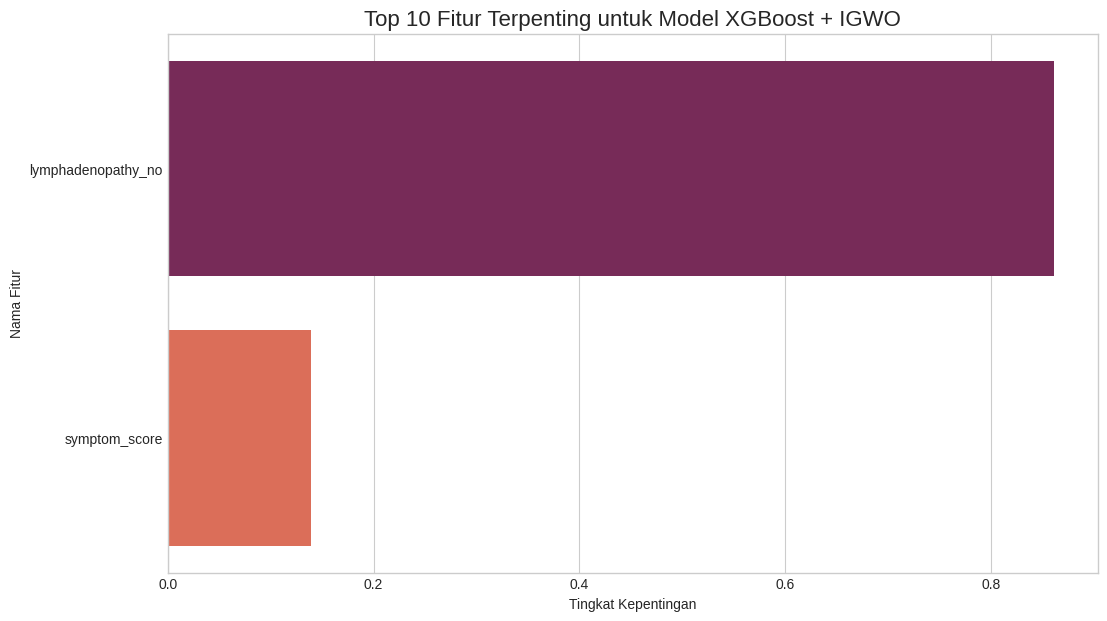


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 17 BERHASIL: Analisis diagnostik komprehensif pada model juara selesai.


In [28]:
# =============================================================================
# STEP 17: ANALISIS DIAGNOSTIK KOMPREHENSIF PADA MODEL JUARA
# =============================================================================
# Impor yang dibutuhkan untuk step ini.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from IPython.display import display, Markdown

print("\n" + "="*80)
print("🚀 MEMULAI STEP 17: ANALISIS DIAGNOSTIK KOMPREHENSIF PADA MODEL JUARA")
print("="*80)

# =============================================================================
# BAGIAN A: IDENTIFIKASI & PELATIHAN ULANG MODEL TERBAIK
# =============================================================================
try:
    if 'final_comparison_df' in locals():
        # --- 17.1: Mengidentifikasi Model Juara dari Tabel Perbandingan ---
        print("--- 17.1: Mengidentifikasi Model Juara dari Hasil Perbandingan ---")

        # Urutkan berdasarkan F1-Score pada Test Set untuk menemukan yang terbaik
        ranked_df = final_comparison_df.sort_values(by='Test F1-Score', ascending=False)
        best_model_row = ranked_df.iloc[0]
        best_model_name_full = best_model_row['Model']

        display(Markdown(f"### Menganalisis Model Juara: **{best_model_name_full}**"))

        # --- Tentukan konfigurasi untuk melatih ulang model juara ---
        is_igwo = "IGWO" in best_model_name_full

        if is_igwo:
            model_name = best_model_name_full.replace(" + IGWO", "")
            X_train_eval, X_test_eval = X_train_igwo, X_test_igwo
            fitur_type = "IGWO"
        else:
            model_name = best_model_name_full.replace(" (All Features)", "")
            X_train_eval, X_test_eval = X_train_smote, X_test_clean
            fitur_type = "All Features"

        # Ambil konfigurasi model dan parameter terbaiknya dari step sebelumnya
        best_model_config = pipeline_setup[model_name]
        best_params = grid_search_igwo.best_params_ if is_igwo else grid_search.best_params_

        # Latih ulang SATU model juara dengan parameter terbaiknya
        print(f"   - Melatih ulang model {model_name} dengan parameter terbaik pada data {fitur_type}...")
        final_best_model = best_model_config['model'].set_params(**best_params)
        final_best_model.fit(X_train_eval, y_train_smote)
        print("   - ✅ Model juara berhasil dilatih ulang.")

        # ======================================================================
        # BAGIAN B: ANALISIS OVERFITTING & PERFORMA
        # ======================================================================
        print("\n--- 17.2: Menganalisis Performa dan Potensi Overfitting ---")

        # Evaluasi pada Training Set (untuk cek overfitting)
        train_f1 = f1_score(y_train_smote, final_best_model.predict(X_train_eval))
        # Ambil skor dari Test Set dari tabel hasil
        test_f1 = best_model_row['Test F1-Score']
        train_test_diff = train_f1 - test_f1

        status = "Indikasi Overfitting" if train_test_diff > 0.05 else "Generalisasi Baik"

        print(f"   - F1-Score (Training Set): {train_f1:.4f}")
        print(f"   - F1-Score (Test Set):     {test_f1:.4f}")
        print(f"   - Kesimpulan: {status} (Selisih Train-Test: {train_test_diff:+.4f})")

        # ======================================================================
        # BAGIAN C: ANALISIS KEPENTINGAN FITUR (FEATURE IMPORTANCE)
        # ======================================================================
        if hasattr(final_best_model, 'feature_importances_'):
            print("\n--- 17.3: Menganalisis Kepentingan Fitur (Feature Importance) ---")

            importances = pd.DataFrame({
                'Fitur': X_train_eval.columns,
                'Tingkat Kepentingan': final_best_model.feature_importances_
            }).sort_values(by='Tingkat Kepentingan', ascending=False)
            top_features = importances.head(10)

            # Visualisasi
            plt.figure(figsize=(12, 7))
            sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=top_features, palette='rocket')
            plt.title(f'Top 10 Fitur Terpenting untuk Model {best_model_name_full}', fontsize=16)
            plt.xlabel('Tingkat Kepentingan'); plt.ylabel('Nama Fitur'); plt.show()
        else:
            print("\n--- 17.3: Analisis Kepentingan Fitur ---")
            print("   - ⚠️ Model ini tidak memiliki atribut 'feature_importances_'.")

        print("\n" + "🎉"*60)
        print("STEP 17 BERHASIL: Analisis diagnostik komprehensif pada model juara selesai.")
        print("="*80)

    else:
        print("🛑 Gagal menjalankan Step 17. Pastikan `final_comparison_df` dari Step 16 sudah ada.")
except Exception as e:
    print(f"🛑 Terjadi error saat menjalankan Step 17: {e}")